
## **Project 2 - Classification**



### Abstract



In this project, we were challenged, as consultants, to develop a predictive model that would help the marketing department of a retail company to identify customers who are more likely to respond positively to marketing campaigns.

To do this, we will use a dataset with data provided by the company representing the demographic characteristics, purchase data and past campaign acceptance data of customers, in a total of 2240 records.

Using this data we will identify the key variables that influence customer behaviour, discovering patterns, in order to develop predictive models using machine learning algorithms that improve the effectiveness of marketing campaigns to be developed in the future.

The success of the project will be measured on the accuracy of the forecasting models, their integration in the company's marketing department to enable real-time forecasting and will contribute to a better understanding of customer behaviour and preferences, leading to more effective marketing strategies in the future.

### Business Understanding



In the privileged relationship with the marketing department, the interlocutors are the marketing analysis team that is responsible for collecting and delivering the consumer data. The customer relationship team and the management of the department will receive the data-driven insights to optimize their marketing strategies and improve customer engagement.

The goal of the marketing department is to optimize consumer adoption of the different campaigns proposed, and to optimize the spending related to the marketing campaigns through performance analysis. For a better understanding, we assume that the campaigns are not related to each other and that they do not constitute a sales funnel. Also, we assume that campaigns are sent to consumers through the following channels: email marketing, mobile marketing (SMS/text message), and social media advertising. 

Therefore, we will analyze the results of each campaign individually and identify the campaign(s) with the best performance and observe the factors that contributed to the results.

In general, the uptake rate for the available campaigns is significantly low, with an average performance of less than 10%. 

However, the target variable that corresponds to the acceptance of the last proposed campaign had a higher result than the other campaigns, with an acceptance value of around 15%.

Once we have identified the target variables and patterns, we will use machine learning algorithms to develop a predictive model. The model will be trained on the historical data and validated using a test dataset to ensure its accuracy and reliability.

We must consider that the company has two sales channels: physical stores and an electronic store.

## Business Goals
We aim to select the best performing predictive model by meeting subjective and measurable success criteria. The subjective success criteria focus on providing valuable information about the demographic characterization of frequent customers and identifying patterns and buying habits among customers responding to marketing campaigns. These criteria help improve our understanding of customer behavior and optimize our marketing strategies.

To evaluate the performance of our predictive model, we have established measurable success criteria. First, the predictive model must have a recall greater than 0.700. By setting this criterion, we ensure that our model is effective in recognizing the real results and answers from the customers. 
We set a high accuracy rate for our prediction model to ensure the reliability of the model.

In addition, we plan to evaluate the performance of the model by using the ROC curves (receiver operating characteristics). In particular, our expectation is that the ROC curves for both classes will be greater than 0.50. ROC curves provide a visual representation of the relationship between the true positive rate and the false positive rate, and a value above 0.50 indicates superior performance to chance.

Finally, we compare the micro average and the macro average to evaluate the overall performance of the model. The micro average considers the total true positives, false positives, and false negatives across all classes, while the macro average calculates the average performance per class. Our goal is to obtain a micro average equal to or greater than the macro average, indicating balanced performance across all customer segments.

By defining these success criteria, we aim to develop a predictive model that provides valuable information about frequent customer demographic characterization and purchase habits, as well as demonstrates reliable and accurate predictions.


For better understanding, we used the folloing table with all the  **Success Criteria**:




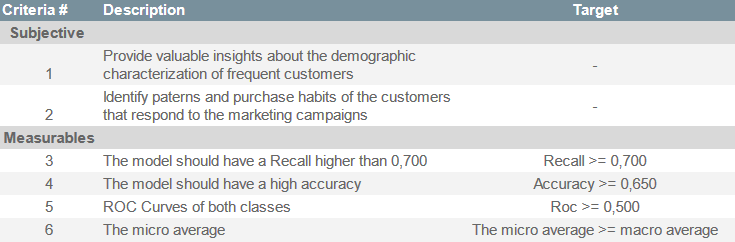

## Current situation and available resources


**Resources**

For this project, we will be working with a dataset consisting of 2,240 records. To analyze it, we will use the Python programming language. Python provides a wide range of libraries and tools for data analysis, making it a suitable choice for this task. With Python, we can efficiently manipulate and explore the dataset to gain valuable insights into the retail market.

Throughout the analysis, we will apply statistical techniques, create visualizations, and generate meaningful summaries to gain a comprehensive understanding of the retail market dynamics during the specified timeframe.


**Constraints**

The dataset does not provide information on whether the characteristics of the marketing campaigns—such as their duration, typology, or goals—are identical. This lack of uniformity may introduce variability in the analysis, making it challenging to draw generalized conclusions about campaign effectiveness.

Also, it does not specify what percentage of the total clients it represents. This absence of information on client representation restricts our ability to accurately assess the dataset's representativeness and generalize the findings to the entire customer base.

Lastly, the dataset does not provide information on the total number of purchases made in each channel (shop, web, and catalogue) and what percentage this data represents within the dataset. Without this information, we face limitations in understanding the relative importance and contribution of each sales channel to the overall retail performance.

It is crucial to be aware of these limitations when interpreting and drawing conclusions from the analysis. It is advisable to approach the findings with care and avoid overgeneralization due to potential biases and the dataset's unknown representativeness in relation to the retail company's entire customer base and marketing campaigns.


## Project Plan
The plan for this project is to follow these steps:


1.   Data understanding: Exploring and describing the variables and structure of the dataset.

2.   Data preparation: Cleaning and transforming the data for better results on the modeling stage.

3. Modeling: Selecting the appropriate techniques and develop models using different algorithms, parameters, and validation methods.

4. Evaluation: Analysing how well models are aligned with success criteria and business objectives.

5. Deployment: Implement the final model into the operational environment, monitor its performance over time, and report the results and outcomes to the stakeholders. This is out of the scope of this project, as this model will be implemented by the company's own Machine Learning Engineers.

## Data Loading- Import Libraries

In [5]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import csv
import numpy as np
import math
import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
import collections
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
#to plot in notebook
#%matplotlib inline

# Data Understanding

### Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

## Import Dataset


In [7]:
# Load data as ds
ds = pd.read_excel('https://github.com/Alito06/All_Datasets/blob/5b2a1298afa9438061ce27f126653ec74946ba5b/campaign.xlsx?raw=true', engine = 'openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2187 non-null   float64
 15  NumDealsPurchases    2240 non-null   i

In [8]:
ds["Dt_Customer"][0]

'2013-05-04'

In [158]:
unique_values = np.unique(ds["Z_CostContact"])
print(unique_values)

[3]


In [10]:
unique_values = np.unique(ds["Z_Revenue"])
print(unique_values)

[11]


* We can see that our dataset it contains a total of 29 columns. However we just have metada from 25 variables. This means we do not have information to 
help us understand the context of these variables.
* In the case of ID and Year_birth, the content of these variables can be understood from context, and it is important to keep them.
* Now, as regards "Z_CostContact" and "Z_Revenue", we can infer from the variable names that the first variable contains information about how much it costs to contact a client, and the second about how much revenue can be expected from each client. However, when we analyze the values, we can see that they are all the same, which means that the information contained in these variables is not useful.
* The data type of the Dt_customer variable is "string", so this could make it difficult to analyze it in our predicting model. So, we will have to convert it into a datatime object.

In [11]:
ds.head(12)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239.0,...,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,...,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57.0,...,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19.0,...,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637.0,...,5,0,0,0,0,0,0,3,11,0
5,20,1965,2n Cycle,Married,46891.0,0,1,2013-09-01,91,43.0,...,4,0,0,0,0,0,0,3,11,0
6,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185.0,...,8,0,0,0,0,0,0,3,11,0
7,24,1960,Master,Together,17144.0,1,1,2014-02-15,96,18.0,...,7,0,0,0,0,0,0,3,11,0
8,25,1958,Graduation,Married,65148.0,0,1,2012-11-16,9,460.0,...,4,0,0,0,0,0,0,3,11,0
9,35,1987,Graduation,Married,25545.0,1,0,2012-09-08,35,32.0,...,6,0,0,0,0,0,0,3,11,1


In [12]:
#Summary statistics for each numeric column in our dataset
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,665,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,NaN,NaN,NaN,303.838623,336.576209,0.0,24.0,173.0,504.0,1493.0


* This dataset contains information about 2240 customers.
* The most common "Education" is Graduation and we also have more married people in our dataset than any other type.
* We should analyze 'MntSweet' in depth as we can see the max amount spent in sweet product by a customer is 23,423,444, which looks like an extreme value. We should take a close look at this variable in the outlier detection stage. If this value is proven to be an outlier, we should treat it in data preparation.




In [13]:
# Check counts of categorical variables
cols = ['Education']
ds[cols].apply(pd.Series.value_counts)

,Education
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


* The most common education we have is **graduation**. Based on our research, we will consider graduation as a bachelor or university degree. The second most common education is **PhD** with 486 customers holding a doctoral degree. 
* Considering the scale here presented, we consider **Basic** as having concluded the 9th grade and **2nd Cycle** corresponds to the conclusion of the high school (secondary school in Portugal).

In [14]:
# Check counts of categorical variables
cols = ['Marital_Status']
ds[cols].apply(pd.Series.value_counts)
 

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


* As we saw before the most frequent value in our "marital_status" variable is **married**. 
*There are also some values that do not make sense in our data such as **Alone**, **Absurd** and **YOLO**. Since the number of observations in each variable is not significant, we should consider removing them since they won't give us reliable insights.

In [15]:
# Convert ID to categorical and chek for duplicates
ds['ID'] = ds['ID'].astype('category')
ds.ID.describe()

count     2240
unique    2240
top          0
freq         1
Name: ID, dtype: int64

* IDs represent the identity of our customers. By this, we know that this variable does not have continuous values, but rather represents a unique individual. That is why we transformed it into a categorical variable so that we could see if there are duplicate rows.

In [16]:
# Check missing values
print(ds.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                3
MntFruits               2
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds           53
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


* We have some variables with missing values such as "Income" with 1,071%, "MntWines" with 0,13%, "MntFruits" with 0,089%, and "MntGoldProds" with 2,366%. However, this does not seem to be a problem, since the percentages are too low considering the total of observations.

## Variable Distribution
In order to better understand our data, we decided to explore it using data visualization to show how our data is distributed in the variables we were provided.

### Distribution of Binary Variables - Bar Plots

In [17]:
ds["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

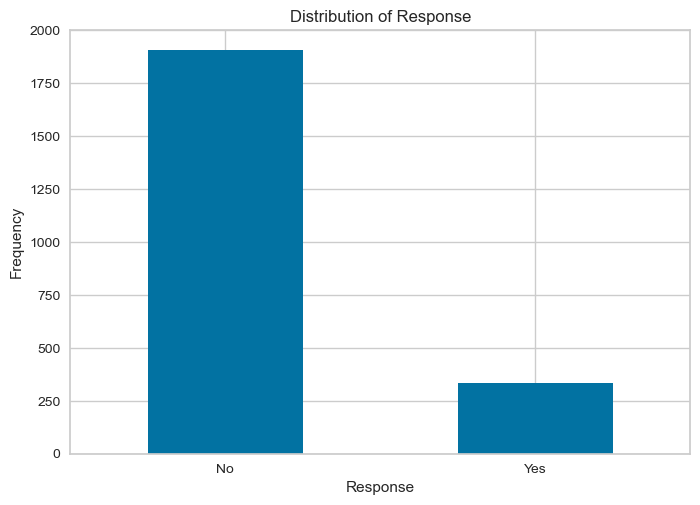

In [18]:
#Graphic to study the distribution of "response"
# count the number of occurrences of each value in the "Response" column
value_counts = ds["Response"].value_counts()

# create a dictionary to map 1 to "Yes" and 0 to "No"
mapping = {1: "Yes", 0: "No"}

# use the map method to replace 1 with "Yes" and 0 with "No"
value_counts.index = value_counts.index.map(mapping)

# create a bar plot of the value counts
value_counts.plot(kind="bar")

# add axis labels and a title
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.title("Distribution of Response")
# rotate the x-axis labels
plt.xticks(rotation=0)
# show the plot
plt.show()

* We can see that only 334 customers accepted the offer of the last campaing. This means about 85% of the customers are not converting after receiving the marketing campaings.

In [19]:
# Check counts of variables
cols = ['Response', "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
ds[cols].apply(pd.Series.value_counts).T

,0,1
Response,1906,334
Complain,2219,21
AcceptedCmp1,2096,144
AcceptedCmp2,2210,30
AcceptedCmp3,2077,163
AcceptedCmp4,2073,167
AcceptedCmp5,2077,163


* As we already saw before, 85% of the customers in our dataset did not answer any marketing campaign. 
* The campaign that has the best perfomance was **AcceptedCmp4** with 167 customers that accepted the offer in the campaing. It is followed by campaigns 3 and 5 in the second place.
* The campaing with worst performance was **AcceptedCmp2** with only 30 customers.

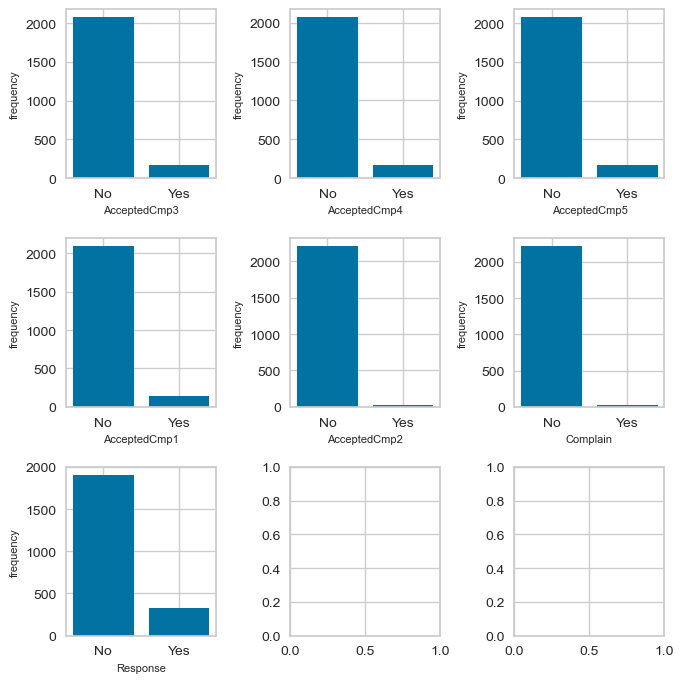

In [20]:
# get the binary columns from the dataframe
binary_cols = [col for col in ds.columns if ds[col].nunique() == 2]

# calculate the number of rows and columns needed for the subplots
num_plots = len(binary_cols)
num_cols = min(num_plots, 3)
num_rows = (num_plots + num_cols - 1) // num_cols

# create a 4x4 grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 7))

# flatten the array of Axes objects for easier indexing
axs = axs.ravel()

# loop through the binary columns and create a bar plot for each one in a subplot
for i, col in enumerate(binary_cols):
    # count the number of occurrences of each value in the column
    value_counts = ds[col].value_counts()
    # create a dictionary to map 1 to "Yes" and 0 to "No"
    mapping = {1: "Yes", 0: "No"}
    # use the map method to replace 1 with "Yes" and 0 with "No"
    value_counts.index = value_counts.index.map(mapping)
    # create a bar plot of the value counts
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_xlabel(col, fontsize=8)
    axs[i].set_ylabel("frequency", fontsize=8)

# adjust spacing between subplots and show the plot
fig.tight_layout()
plt.show()

* We can see that no campaign had a good performance based on the number of customers that accepted the offer. The one that peformed worst was campaign 2. 
* Only 21 clients complained in the last 2 years, which shows that the campaigns were not intrusive.

### Numeric Variables - Histograms

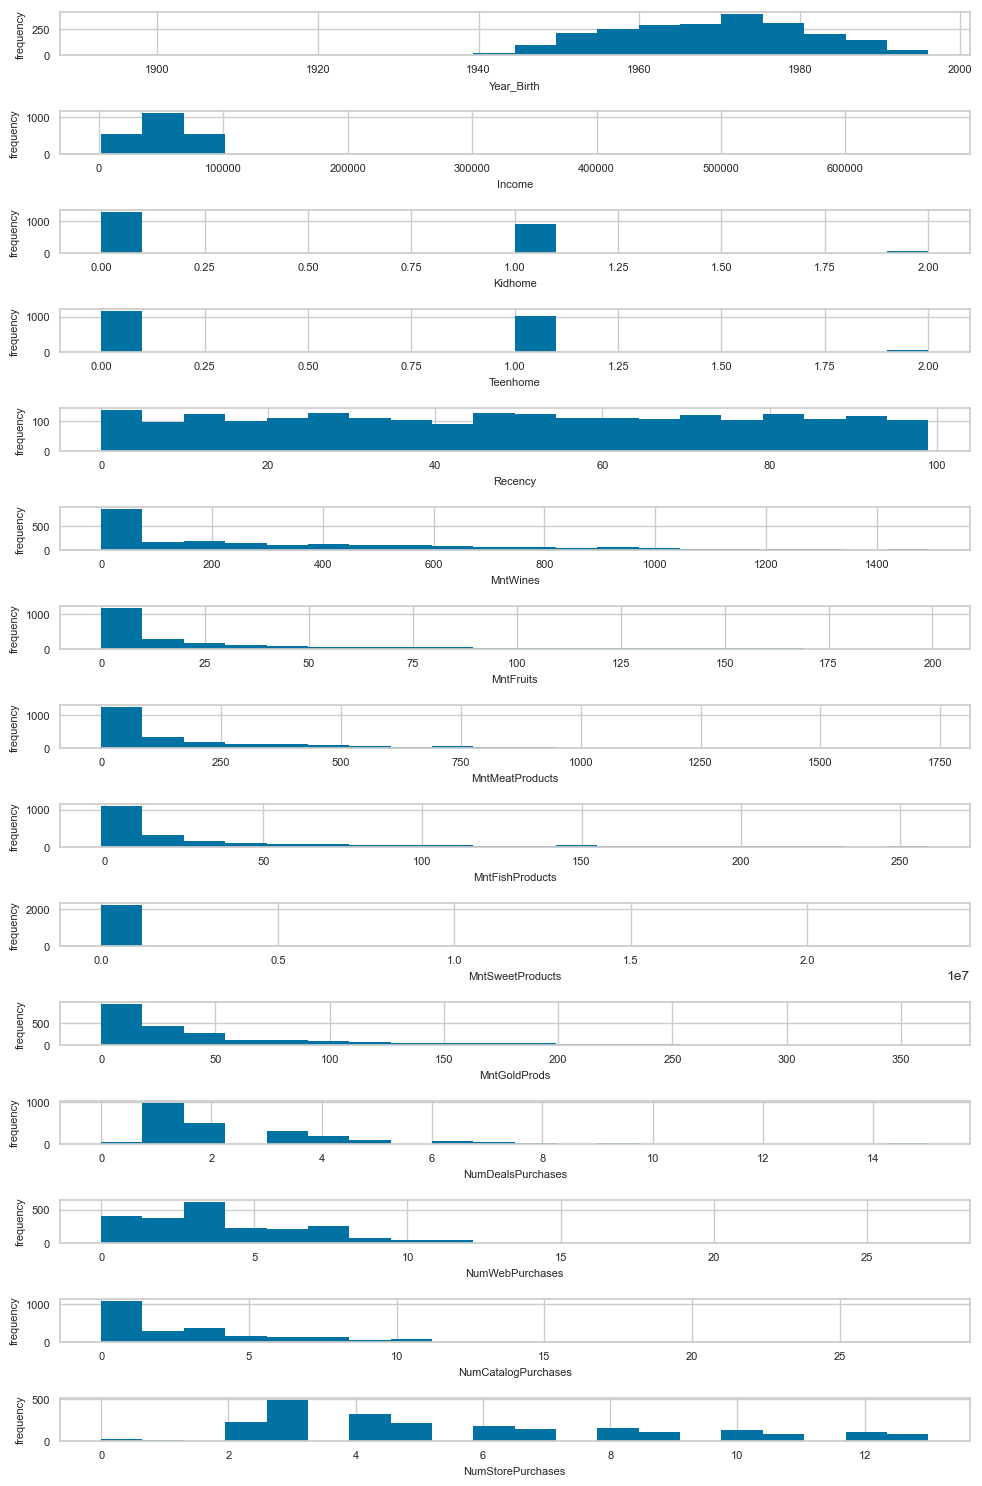

In [21]:
#The distribution of the other variables
cols =['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency' ,'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

fig, axs = plt.subplots(nrows=len(cols), figsize=(10, 15))

for i, col in enumerate(cols):
    ds[col].hist(bins=20, ax=axs[i], xlabelsize=8, ylabelsize=8) 
    axs[i].set_xlabel(col, fontsize=8)
    axs[i].set_ylabel('frequency', fontsize=8)

plt.tight_layout()
plt.show()

* We found that most of our variables related to the amount spent in each product have a positively-skewed distribution. In the case of the sales variables, a positively-skewed distribution indicates that most customers tend to spend smaller amounts on products, while a small number of customers make relatively large purchases. 
* NumStorePurchases and Recency have mutimodal modality, meaning they have more than two peaks in the distribution of the data. This means that the data distribution for these variables does not exhibit a single, dominant peak. Instead, it shows multiple peaks or clusters, indicating the presence of distinct groups or subgroups within the data.
* MntGoldProds and MntFishProducts have wider histograms to the right side meaning that have a bigger range comparing to the other values and this might represent outliers or extreme values.

### Numeric Variables - Boxplots

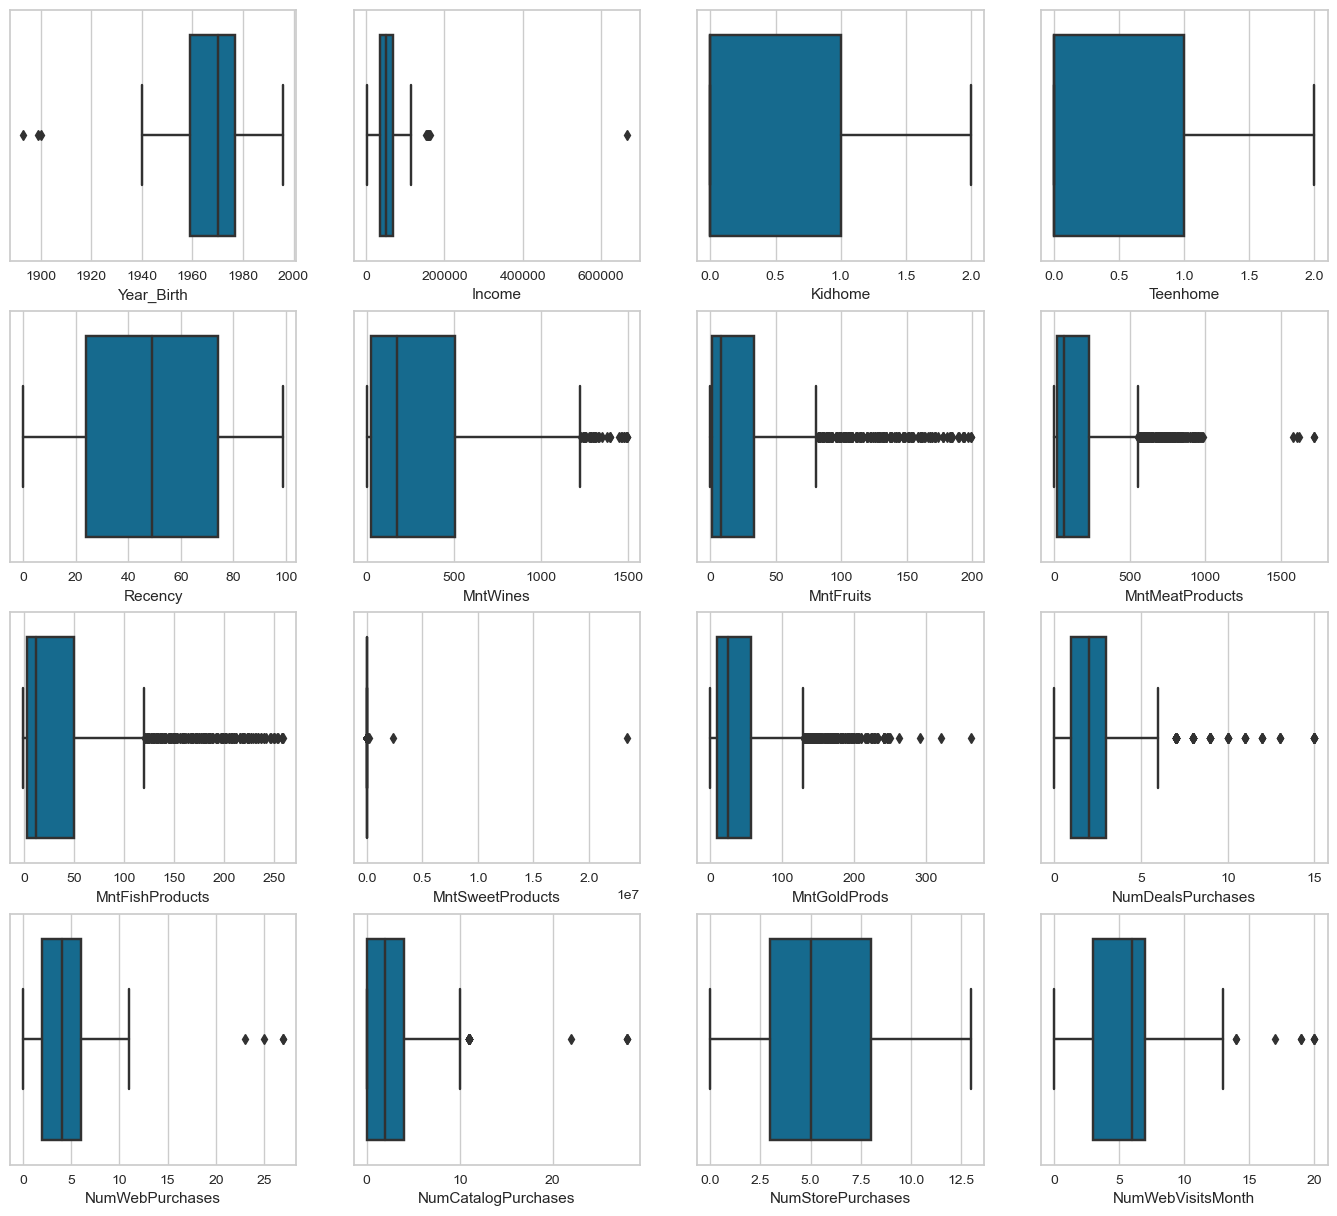

In [22]:
#Do boxplots of all numerical variables
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(4,4 , figsize=(17, 15))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

* We have some variables that present outliers such as MntGoldProds, MntfishProducts, and MntFruits, among others.
* For example, in Year_Birth we have some extreme values such as customers born in 1893 and 1900 that it won't make sense in real-life to be analyzed.
* Also, in Income, we have one customer which makes almost 13 times more than the average. This makes it an outlier.

In [23]:
# Calculates the correlation matrix for all the variables in ds and then selects the target variable.
corr_matrix= ds.corr()
response_corr= corr_matrix["Response"]
print(response_corr)

Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247586
MntFruits              0.122264
MntMeatProducts        0.236335
MntFishProducts        0.111273
MntSweetProducts       0.049275
MntGoldProds           0.137976
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Name: Response, dtype: float64


In [24]:
# Highest positive correlation
top_corr_vars = response_corr.drop('Response').nlargest(2)
for var, corr in top_corr_vars.iteritems():
    print(f"{var} has a correlation coefficient of {corr:.3f} with Response")

AcceptedCmp5 has a correlation coefficient of 0.327 with Response
AcceptedCmp1 has a correlation coefficient of 0.294 with Response


In [25]:
#Highest negative correlation
top_corr_vars = response_corr.drop('Response').nsmallest(2)
for var, corr in top_corr_vars.iteritems():
    print(f"{var} has a correlation coefficient of {corr:.3f} with Response")

Recency has a correlation coefficient of -0.198 with Response
Teenhome has a correlation coefficient of -0.154 with Response


* In order to know if there is any influence between our  predictor variables and our target, we decided to measure their correlation. 
* It seems that none of the variables shows a significant positive or negative correlation with the target.
* However AcceptCmp5 is the one with highest positive correlation of 0.327 and Recency with a highest negative correlation of -0.198.

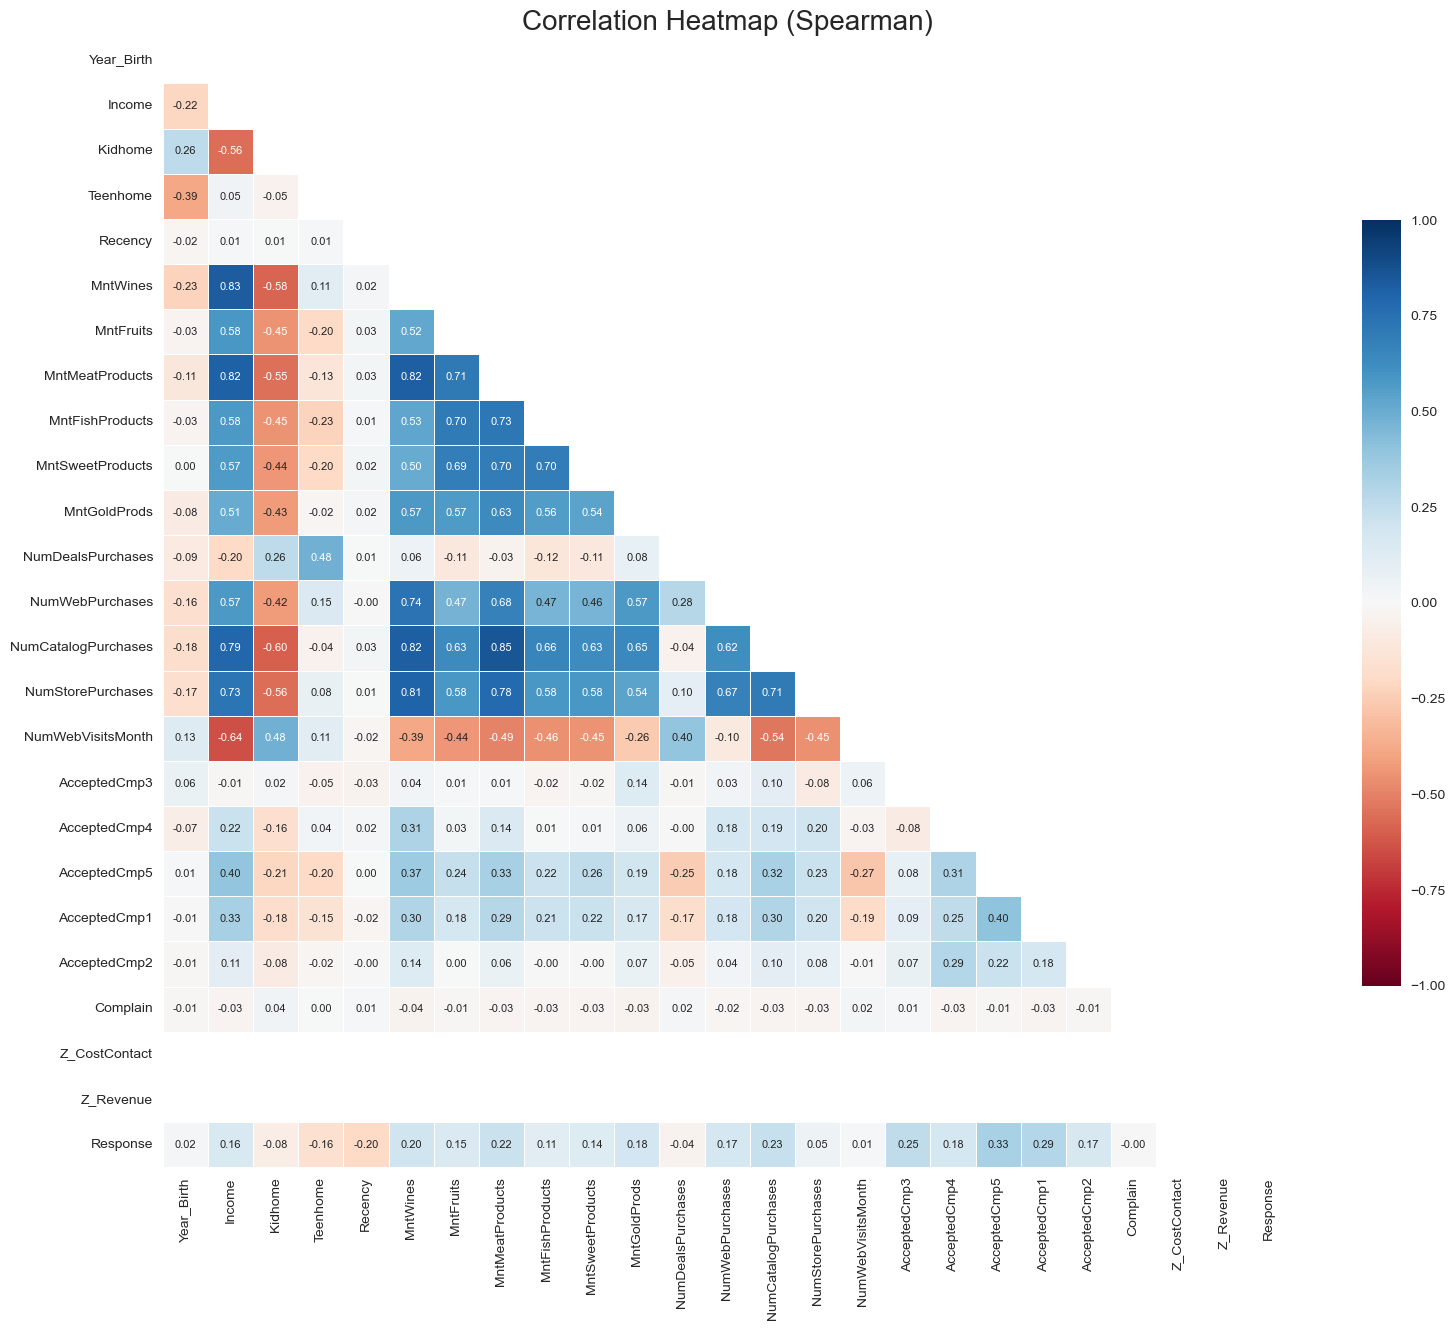

In [26]:
# Compute the correlation matrix - Spearman
corr = ds.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=1, vmin=-1, center=0,
            square=True, annot=True, fmt='.2f', annot_kws={"fontsize":8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title("Correlation Heatmap (Spearman)", fontsize=20)
plt.tight_layout()
plt.show()


We can also see that Z_CostContact and Z_revenue do not have any correlation with the data. 

# Data Preparation



## Feature engineering

* Taking into account what we observed in the data understanding phase, we decided to make some changes in our data to ensure that the results of our analysis are valid and reliable.

In [27]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [28]:
# Set the 'ID' column as the index
X.set_index('ID', inplace=True)

* It is important to ensure that ID values are unique and meaningful to avoid confusions or errors. As we saw before, ID is our unique identifier for each observation and it will be useful to indentify one customer from another. After putting our ID as an index we will see if we have duplicates. 

* We will create some variables, such as age and seniority, that will help our machine learning models understand our data better.

In [29]:
#Derive age from birth year
current_year = 2023
X['Age'] = current_year - X['Year_Birth']
print(X['Age'].head(10))

ID
0     38
1     62
9     48
13    76
17    52
20    58
22    47
24    63
25    65
35    36
Name: Age, dtype: int64


In [30]:
#Summary statistics of Age
X['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

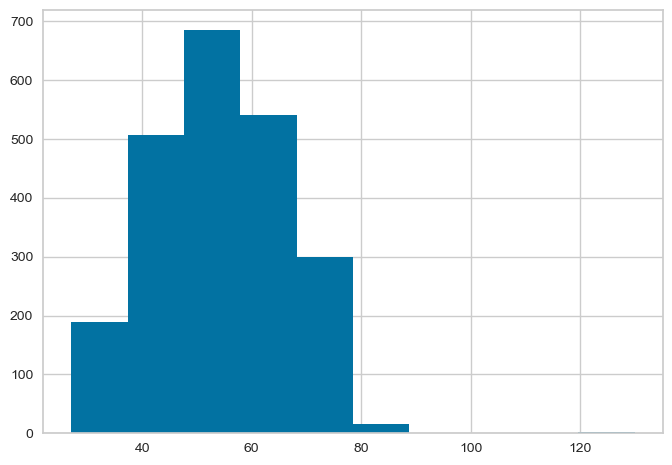

In [31]:
# Histogram of Age
plt.hist(x=X["Age"])
plt.show()

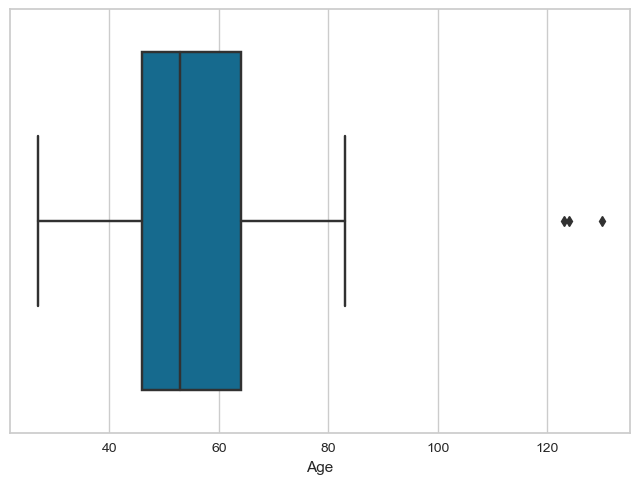

In [32]:
# Boxplot of Age
sns.boxplot(x=X["Age"])
plt.show()

In [33]:
X = X.drop('Year_Birth', axis=1)

* We decided to create a new column with the **Age** of our customers and treat it as a continuous numerical variable, which is easier to work with and interpret than a discrete variable like **year_birth**. Age is a more direct indicator of a person's life stage and behavior than birth year. 
* Knowing this, we can know that in our dataset we have customers who are on average 54 years old. The youngest person in the dataset is 27 years old. 25% of the people in the dataset are younger than 46 years old, half of the people in the dataset are younger than 53 years old and 75% of the people in the dataset are younger than 64 years old.
* A curious fact is that the oldest person is 130 years old. By knowing this, we may analyze if we have more customers who were born in 1893 or near this period and think if it makes sense to have customers who are older than 100 years. We might consider treating them as a outliers and replace their age with the most frequent age in the dataset. 

In [34]:
#Calcute the seniority of our customers
X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer']).dt.year
current_year = 2023
X['Seniority'] = current_year - X['Dt_Customer']
X['Seniority'].head(10)

ID
0     10
1      9
9     11
13    10
17    10
20    10
22    11
24     9
25    11
35    11
Name: Seniority, dtype: int64

In [35]:
#Summary statistics for each numeric column in our dataset
X['Seniority'].describe()

count    2240.000000
mean        9.946429
std         1.091518
min       -19.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        11.000000
Name: Seniority, dtype: float64

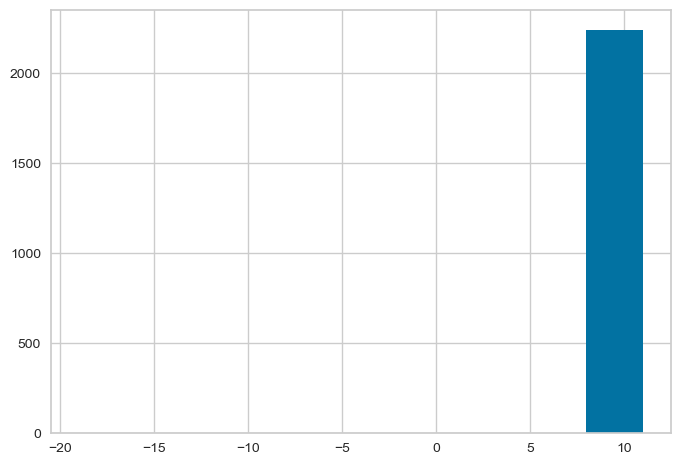

In [36]:
# Histogram of Seniority
plt.hist(x=X["Seniority"])
plt.show()

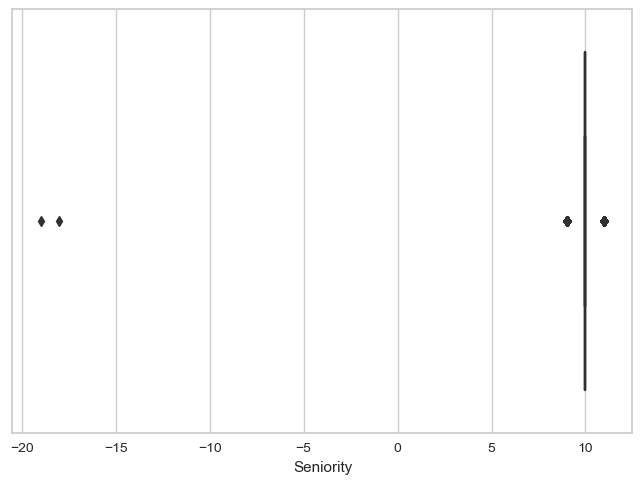

In [37]:
# Boxplot of Seniority
sns.boxplot(x=X["Seniority"])
plt.show()

In [38]:
X = X.drop('Dt_Customer', axis=1)

* We created the numerical variable **Seniority** knowing that our predictive model does not work with categorical variables. 
* By knowing the Seniority of our customers, we can get an indication of how long a customer  has been buying from the company, which can inform marketing strategies, customer retention efforts, and product development.
* The average number of years a customer has been in our dataset is 9 years. With an standar deviation of 1.09 indicating that the values are relatively close to the mean value.
* The minimum value of the Seniority is -19. This value is odd becaus it implies that there are some customers who have been in the company for a negative number of years. So, the date when they bought from the company is in the future. This could be due to entry errors. 25%, 50% and 75% of the customers have been in the company for at least 10 years.
* The maximum is 11 years meaning that we do not have customers who have been with the company for more than 11 years.


In [39]:
#Replace the negative values with the mean rounded
X.loc[X['Seniority'] < 0, 'Seniority'] = 10

In [40]:
# calculates the total amount spent by each customer over the past 2 years
X['TotalSpent'] = X['MntFishProducts'] + X['MntMeatProducts'] + X['MntFruits'] + X['MntSweetProducts'] + X['MntWines'] + X['MntGoldProds']
X['TotalSpent'].astype(float)
X['TotalSpent']

ID
0        1198.0
1         577.0
9         120.0
13         32.0
17       1028.0
          ...  
11178      32.0
11181       8.0
11187      69.0
11188      89.0
11191     139.0
Name: TotalSpent, Length: 2240, dtype: float64

In [41]:
# Remove columns that we determined that wouldn't be of much use
cols = ['Z_CostContact', 'Z_Revenue']
X.drop(columns=cols, inplace=True)

In [42]:
#Check the duplicates observations
num_duplicates = X.duplicated().sum()
print("Number of duplicate rows: ", num_duplicates)

Number of duplicate rows:  168


* After we set our ID as an index, we observed that we have 168 duplicates, in other words 7,5% of the dataset is made up of duplicate values with the only difference being the ID number. We decided to eliminate them knowing that all the information was exactly the same and it could have been an error when duplicating some data in some process done before.

In [43]:
X = X.drop_duplicates()
X.duplicated().sum()

0

In [44]:
# We decided to replace the null values with the median
X["Income"] =  X["Income"].fillna((X["Income"].median()))
X["Income"].isna().sum()

# In the following cases, we replaced the null values with 0, since this means  that specific customer never purchased the product
X["MntWines"] =  X["MntWines"].fillna(0)
X["MntWines"].isna().sum()

X["MntFruits"] =  X["MntFruits"].fillna(0)
X["MntFruits"].isna().sum()

X["MntGoldProds"] =  X["MntGoldProds"].fillna(0)
X["MntGoldProds"].isna().sum()

X["TotalSpent"] =  X["TotalSpent"].fillna(0)
X["TotalSpent"].isna().sum()

0

* In data understanding, we realized that we have some missing values and, as it was a small percentage, we decided to replace them with zero, assuming that the customer never did a purchase in that category.  

In [45]:
len(X.index)

2072

## Handling Outliers
##### Outliers are data points that are significantly different from the rest of our data. As we saw above, in the "Age" column, we have customers who are over 100 years old and also customers who are going to buy from the company in the future. So, we have to treat them in order to have data that makes sense and provides accurate insights.

In [46]:
# We are treating the nonsensical categories with very few rows as outliers, and thus, delete them
valid_categories = ['Married', 'Single', 'Together', 'Divorced', 'Widow']
X = X[X['Marital_Status'].isin(valid_categories)]
count = X.groupby('Marital_Status').agg(count=('Marital_Status', 'count'))
print(count)

                count
Marital_Status       
Divorced          216
Married           800
Single            453
Together          525
Widow              71


* We considered **YOLO**, **Alone** and **Absurd** as outliers, so in order to reduce the noise of the data, it made sense for us to remove them.



In [47]:
#Replace ages that are older than 90  with the mean
X.loc[X['Age'] > 90 , 'Age'] = 54

* This decision was made in order to remove outliers that could skew the distribution of the age variable. The cutoff age is based on the information obtained from our previous boxplot, which showed that our customers are **typically younger than 90**.
* In this case, we replaced abnormal values with the mean of the population.

In [48]:
#Replace outliers from the variables in the dataset using interquartile range (IQR) and calculating lower and upper boundsCalculate the interquartile range (IQR)

#Replace outliers from the variable 'Income'
Q1 = X['Income'].quantile(0.25)
Q3 = X['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['Income'].median()
X.loc[X['Income'] < lower_bound, 'Income'] = median
X.loc[X['Income'] > upper_bound, 'Income'] = median

#Replace outliers from the variable 'MntWines'
Q1 = X['MntWines'].quantile(0.25)
Q3 = X['MntWines'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntWines'].median()
X.loc[X['MntWines'] < lower_bound, 'MntWines'] = median
X.loc[X['MntWines'] > upper_bound, 'MntWines'] = median

#Replace outliers from the variable 'MntFruits'
Q1 = X['MntFruits'].quantile(0.25)
Q3 = X['MntFruits'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntFruits'].median()
X.loc[X['MntFruits'] < lower_bound, 'MntFruits'] = median
X.loc[X['MntFruits'] > upper_bound, 'MntFruits'] = median

#Replace outliers from the variable 'MntMeatProducts'
Q1 = X['MntMeatProducts'].quantile(0.25)
Q3 = X['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntMeatProducts'].median()
X.loc[X['MntMeatProducts'] < lower_bound, 'MntMeatProducts'] = median
X.loc[X['MntMeatProducts'] > upper_bound, 'MntMeatProducts'] = median

#Replace outliers from the variable 'MntMeatProducts'
Q1 = X['MntFishProducts'].quantile(0.25)
Q3 = X['MntFishProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntFishProducts'].median()
X.loc[X['MntFishProducts'] < lower_bound, 'MntFishProducts'] = median
X.loc[X['MntFishProducts'] > upper_bound, 'MntFishProducts'] = median

#Replace outliers from the variable 'MntSweetProducts'
Q1 = X['MntSweetProducts'].quantile(0.25)
Q3 = X['MntSweetProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntSweetProducts'].median()
X.loc[X['MntSweetProducts'] < lower_bound, 'MntSweetProducts'] = median
X.loc[X['MntSweetProducts'] > upper_bound, 'MntSweetProducts'] = median

#Replace outliers from the variable 'MntMeatProducts'
Q1 = X['MntMeatProducts'].quantile(0.25)
Q3 = X['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntMeatProducts'].median()
X.loc[X['MntMeatProducts'] < lower_bound, 'MntMeatProducts'] = median
X.loc[X['MntMeatProducts'] > upper_bound, 'MntMeatProducts'] = median

#Replace outliers from the variable 'MntGoldProds'
Q1 = X['MntGoldProds'].quantile(0.25)
Q3 = X['MntGoldProds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['MntGoldProds'].median()
X.loc[X['MntGoldProds'] < lower_bound, 'MntGoldProds'] = median
X.loc[X['MntGoldProds'] > upper_bound, 'MntGoldProds'] = median

#Replace outliers from the variable 'NumWebPurchases'
Q1 = X['NumWebPurchases'].quantile(0.25)
Q3 = X['NumWebPurchases'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['NumWebPurchases'].median()
X.loc[X['NumWebPurchases'] < lower_bound, 'NumWebPurchases'] = median
X.loc[X['NumWebPurchases'] > upper_bound, 'NumWebPurchases'] = median

#Replace outliers from the variable 'NumCatalogPurchases'
Q1 = X['NumCatalogPurchases'].quantile(0.25)
Q3 = X['NumCatalogPurchases'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['NumCatalogPurchases'].median()
X.loc[X['NumCatalogPurchases'] < lower_bound, 'NumCatalogPurchases'] = median
X.loc[X['NumCatalogPurchases'] > upper_bound, 'NumCatalogPurchases'] = median

#Replace outliers from the variable 'NumWebVisitsMonth'
Q1 = X['NumWebVisitsMonth'].quantile(0.25)
Q3 = X['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['NumWebVisitsMonth'].median()
X.loc[X['NumWebVisitsMonth'] < lower_bound, 'NumWebVisitsMonth'] = median
X.loc[X['NumWebVisitsMonth'] > upper_bound, 'NumWebVisitsMonth'] = median

#Replace outliers from the variable'NumDealsPurchases'
Q1 = X['NumDealsPurchases'].quantile(0.25)
Q3 = X['NumDealsPurchases'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = X['NumDealsPurchases'].median()
X.loc[X['NumDealsPurchases'] < lower_bound, 'NumDealsPurchases'] = median
X.loc[X['NumDealsPurchases'] > upper_bound, 'NumDealsPurchases'] = median


* First, we recognized which were the outliers using the IQR method, and then we replaced them with the median. By this, any data points that fall below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR are considered outliers. With this method, we expect to improve the accuracy of the statistical analyses of our dataset and their distribution.

In [49]:
#Encode categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Education', 'Marital_Status'])

* In order to have a better performance in our results, we decided to perfom one-hot enconding to the categorical variables.

In [50]:
#Summary statistics for each numeric column in our dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2065 entries, 0 to 11191
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2065 non-null   float64
 1   Kidhome                  2065 non-null   int64  
 2   Teenhome                 2065 non-null   int64  
 3   Recency                  2065 non-null   int64  
 4   MntWines                 2065 non-null   float64
 5   MntFruits                2065 non-null   float64
 6   MntMeatProducts          2065 non-null   int64  
 7   MntFishProducts          2065 non-null   int64  
 8   MntSweetProducts         2065 non-null   int64  
 9   MntGoldProds             2065 non-null   float64
 10  NumDealsPurchases        2065 non-null   int64  
 11  NumWebPurchases          2065 non-null   int64  
 12  NumCatalogPurchases      2065 non-null   int64  
 13  NumStorePurchases        2065 non-null   int64  
 14  NumWebVisitsMonth

In [51]:
X.head(7)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
ID,,,,,,,,,,,,,,,,,,,,,
0,70951.0,0,0,66,239.0,10.0,67,12,8,54.0,...,0,0,1,0,0,0,1,0,0,0
1,57091.0,0,0,0,464.0,5.0,64,7,0,37.0,...,0,0,1,0,0,0,0,1,0,0
9,46098.0,1,1,86,57.0,0.0,27,0,0,36.0,...,0,0,0,1,0,0,0,1,0,0
13,25358.0,0,1,57,19.0,0.0,5,0,0,8.0,...,0,0,0,0,1,0,0,0,0,1
17,60491.0,0,1,81,637.0,47.0,237,12,19,76.0,...,0,0,0,0,1,0,1,0,0,0
20,46891.0,0,1,91,43.0,12.0,23,29,15,61.0,...,1,0,0,0,0,0,1,0,0,0
22,46310.0,1,0,99,185.0,2.0,88,15,5,14.0,...,0,0,1,0,0,1,0,0,0,0


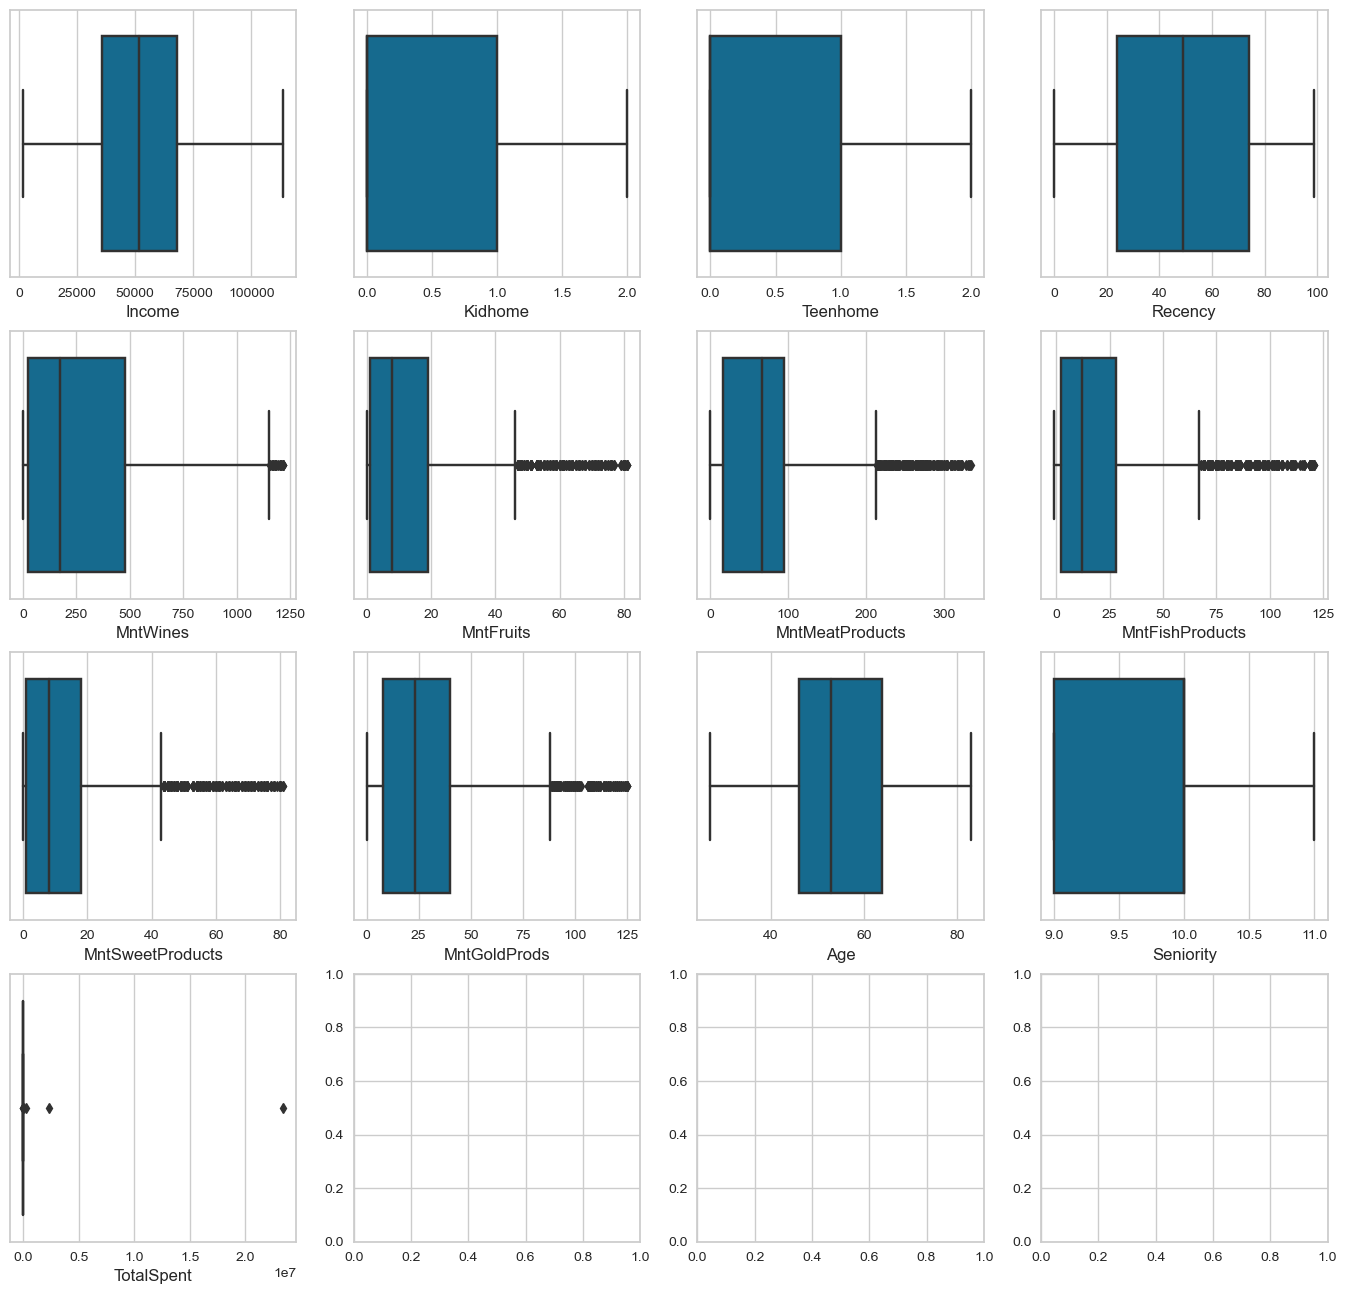

In [52]:
#Do boxplots of all numerical variables after dealing with outliers
numerical= ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age', 'Seniority', 'TotalSpent']
fig, ax = plt.subplots(4, 4, figsize=(17, 16))

for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=X[var], ax=subplot)
    subplot.set_xlabel(var, fontsize=12)
plt.show()

* As we can see we still have outliers. This can be
for many reasons, such measurement errors, data entry errors, and in this case, we could say we have natural variability in some variables. After having dealt with the most extreme outliers, we decided to continue our model with the remaining ones since they can also be helpful, as the the models can learn to handle unusual or extreme data points more effectively and generate better segment definitions or classifications.

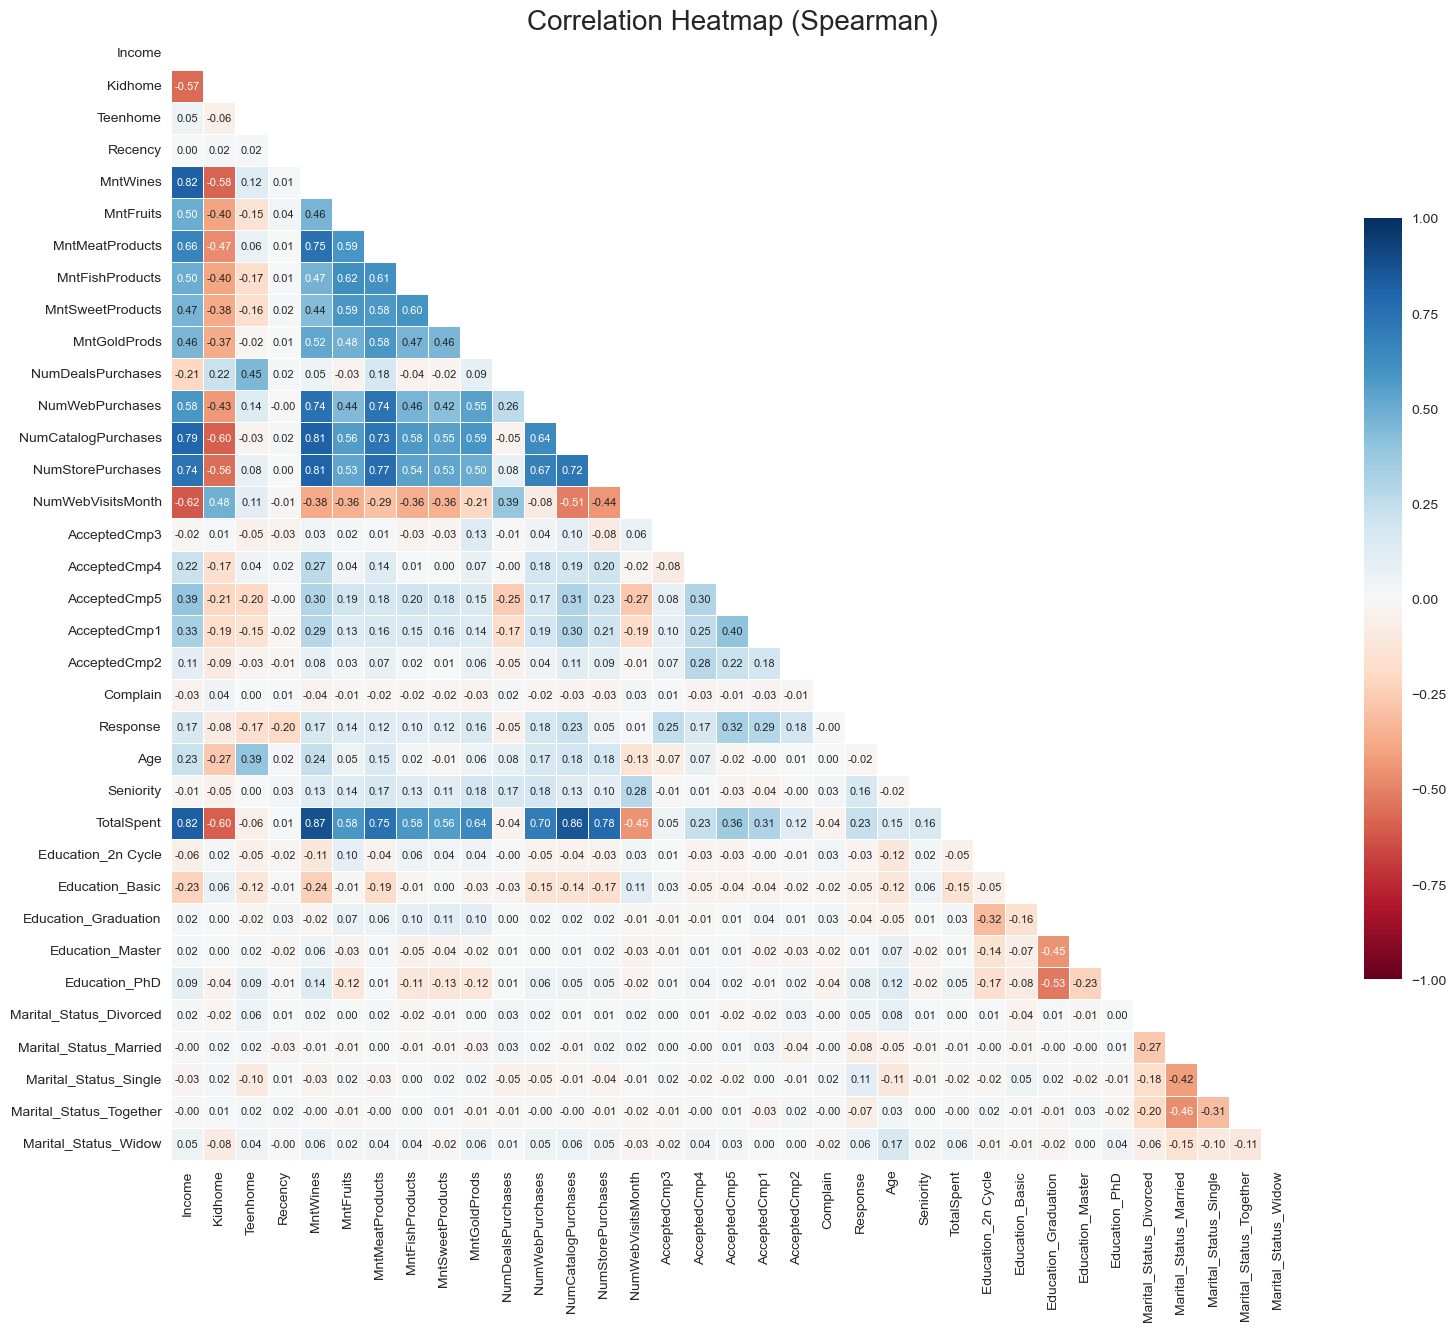

In [53]:
# Compute the correlation matrix - Spearman
corr = X.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=1, vmin=-1, center=0,
            square=True, annot=True, fmt='.2f', annot_kws={"fontsize":8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title("Correlation Heatmap (Spearman)", fontsize=20)
plt.tight_layout()
plt.show()

* The positive correlation of 0.87 between "TotalSpent" and "Mnt_Wines" indicates that the higher the total amount spent, the higher the amount spent on wines and the more purchases made through the catalogue.


* We can verify that the value of income is highly correlated with the amount of total spent.


* Another pattern we can see is that the higher the total amount spent, the more purchases made through store and higher the amount spent on meat products.

* In the negative way, we can see that number of visits to the website is highly correlated with Income. This may be explained for example by the fact that people with a higher income tend to realize less visits to the site for example to analyse the prices, taking also in consideration that the "Income" variable has a positve correlation with variables related to purchases. People with less income tend to visit more the website to monitor the prices. 

* We can also find some surprising patterns such as the Total Spent and Kids at home. This correlation means that when for example the number of kids at home is higher, the total spent is lower. 


In [54]:
X_final = X

# Modeling

## **Model 1**- Decision Tree

In [55]:
# Create the Target
y = X['Response']

In [56]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123)

In [57]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

Counter({0: 1315, 1: 233})
0    0.849483
1    0.150517
Name: Response, dtype: float64


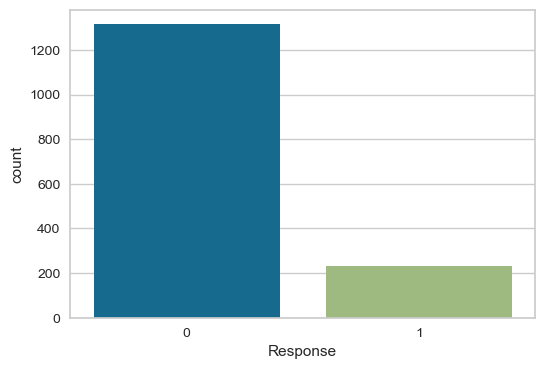

In [58]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

* The resulting output shows that the negative class (0) accounts for 85.4% of the training dataset, while the positive class (1) accounts for only 14.5%. This means that the training dataset is imbalanced towards the negative class (class 0). This imbalance may affect the performance of the classification model and require special treatment to balance the dataset, such as oversampling or undersampling techniques.

Counter({1: 1315, 0: 1315})


<AxesSubplot:xlabel='Response', ylabel='count'>

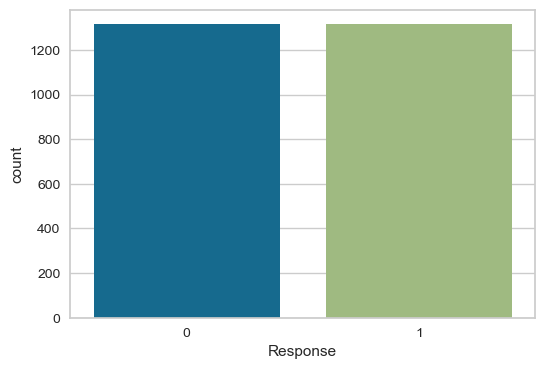

In [59]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

* In this code we want to balance the class distribution and prevent bias by performing oversampling on the training data using the Synthetic Minority Over-sampling Technique (SMOTE) algorithm from the imblearn package. SMOTE generates new instances of the minority class (class 1) by creating synthetic examples that are similar to the existing ones. This is done in order to balance the class distribution and prevent bias towards the majority class during model training.
* The output will show us now that there are 1322 instances in each class.

In [60]:
# Create object and train the model
classModel = tree.DecisionTreeClassifier(max_depth=3, random_state=123)
classModel.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3, random_state=123)

* Create the model using the DecisionTreeClassifier() function from the tree module in Python's scikit-learn library.
* The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels. This is done to prevent overfitting, where the model becomes too complex and captures noise in the training data instead of the underlying patterns.
* We set the random_state to 123, which ensures that the same sequence of random numbers is generated each time the code is run, making the results reproducible.
* The fit() method learns the underlying patterns in the training data and builds a decision tree model that can predict the target label for new input data.

## Evaluation - Decision Tree


In [61]:
#  Generate the predictions y for X_train and X_test to see how the model is performing
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

In [62]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [63]:
# Function to plot confusion matrix 
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

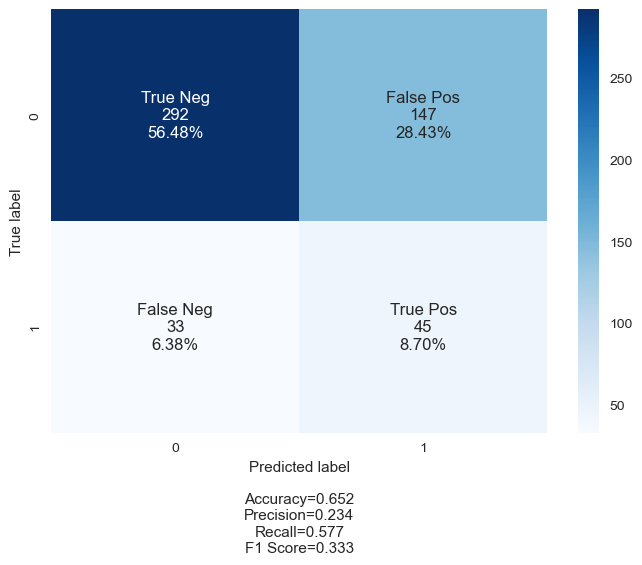

In [64]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [65]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.767681,0.651838
1,PRECISION,0.719451,0.234375
2,RECALL,0.877567,0.576923
3,F1 SCORE,0.790682,0.333333
4,AUC,0.767681,0.621036


* The model indicates an accuracy of 0.76 on the training set and 0.64 on the test set. This means that the model is able to correctly classify roughly 64% of the instances it analyzes, which is a reasonable result.

* Looking at the precision and recall measures, we see that the precision is way higher on the training set than on the test set, which may suggest some overfitting. Similarly, the recall on the test set is much lower than on the training set. This means that the model is better at correctly identifying positive instances in the training set, but has more difficulty doing so in the test set.

* The F1 score, which balances precision and recall, is higher on the training set than on the test set. This again suggests that it may be overfitting to the training data.

* The AUC  measures how well the model ranks instances in terms of their likelihood of being positive. In this case, it is 0.76 on the training set and 0.66 on the test set. This indicates that the model is reasonably good at ranking instances, but may not be as good at distinguishing between positive and negative instances.

* Overall, the results suggest that the model is performing reasonably well in terms of recall. However, its precision and F1 are relative low, indicating that it may be making too many false positive predictions. 

C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


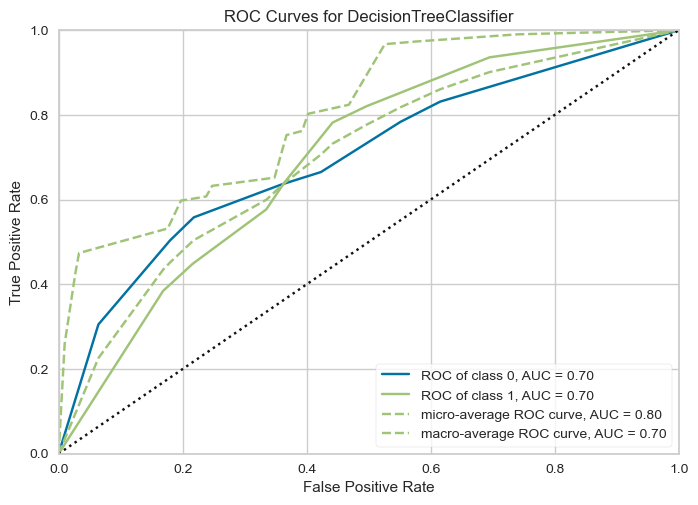

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a classification model at all classification thresholds. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In this case, the ROC curve is plotted for two classes, 0 and 1. The AUC (Area Under the Curve) is a measure of the ROC curve's performance, with a value of 1 representing a perfect classifier and 0.5 representing a random guess.

ROC of class 0, AUC=0.69: This means that the model's ability to distinguish class 0 from other classes is moderate, with an AUC of 0.69.
ROC of class 1, AUC=0.69: This means that the model's ability to distinguish class 1 from other classes is also moderate, with an AUC of 0.69.
Micro-average ROC curve, AUC= 0.78: This is the ROC curve that aggregates the contributions of all classes, weighting each observation equally. The micro-average of the AUC of 0.78 indicates that the overall performance of the model is good.
The macro-average ROC curve, AUC= 0.69: This is the ROC curve that averages the ROC curves of all classes, giving equal weight to each class. The macro-average AUC of 0.69 indicates that the model's performance is moderate across all classes.

The black line in the middle of the graph represents the ROC curve for a random classifier. The fact that all the ROC curves are above the random classifier line suggests that the model is performing better than a random guess.

## **Model 2**- Naïve Bayes


In [67]:
 # Create object and train the model
classModel = GaussianNB()
classModel.fit(X_train2, y_train2)

GaussianNB()

## Evaluation 2 - Naïve Bayes

In [68]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

In [69]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [70]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

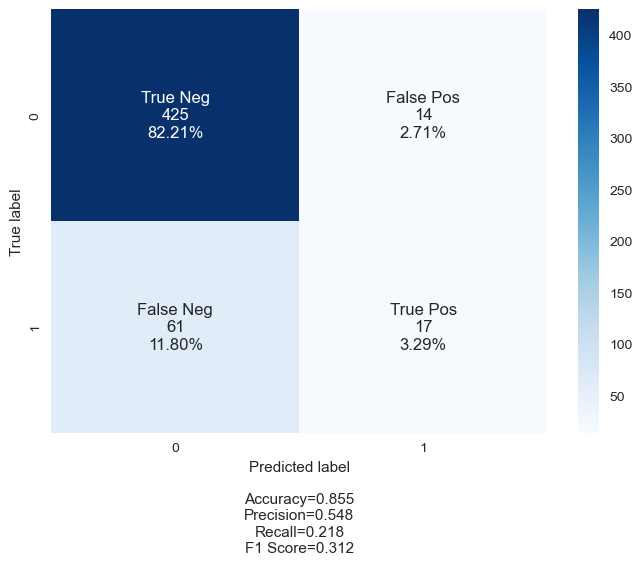

In [71]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [72]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.574144,0.854932
1,PRECISION,0.823920,0.548387
2,RECALL,0.188593,0.217949
3,F1 SCORE,0.306931,0.311927
4,AUC,0.574144,0.593029


Based on the confusion matrix and the calculated metrics, we can conclude that the model has a moderate performance:
* The model has an accuracy of 0.826 on the test set, which means that it correctly classifies the proportion out of the total number of instances 82.6% of the times.
* We have a precision of 0.407 on the test set, which means that out of all the instances it predicted as positive, only 40.7% were actually positive.
* About the recall measure, the model has 0.129 on the test set, which means that out of all the actual positive instances, only 12.9% were correctly identified by the model.
* F1 score: The harmonic mean of precision and recall. Our model has an F1 score of 0.196 on the test set, which is a weighted average of precision and recall.
* AUC: The area under the receiver operating characteristic (ROC) curve, which is a plot of true positive rate against false positive rate at different classification thresholds. An AUC of 0.546 on the test set, which means that it has a slightly better performance than random guessing, but there is still a lot of room for improvement.

Overall, the model has a relatively high accuracy on the test set, however, its precision, recall, and F1 score are relatively low, indicating that it may not perfom well in identifying the positive instances. The AUC score is slightly better than random guessing but not impressive.

C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


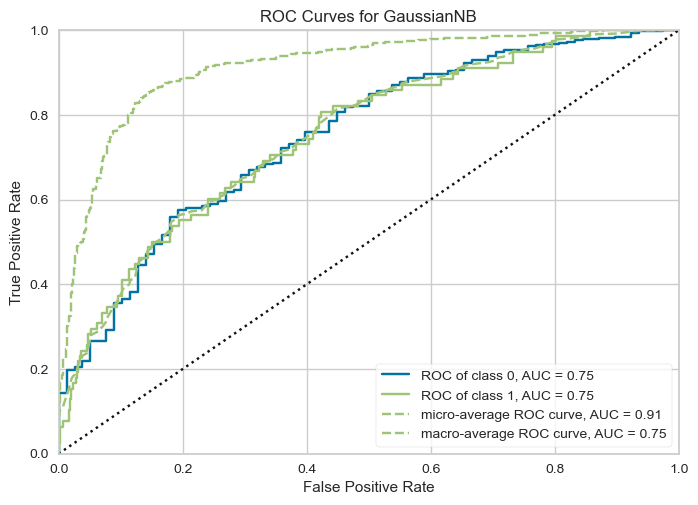

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

 The ROC curves of class 0 and class 1 have the same AUC value of 0.69, which indicates that the model has a moderate level of discrimination power in distinguishing between the positive and negative instances of both classes.

The micro-average ROC curve is calculated by considering all the instances and aggregating the true positive rate and false positive rate across all classes. The micro-average AUC of 0.89 suggests that the model perfoms well in identifying both the positive and negative instances, as it captures the tradeoff between sensitivity and specificity for all the instances.

The macro-average ROC curve is calculated by averaging the true positive rate and false positive rate across each class separately. The macro-average AUC of 0.70 indicates that the model has a fair overall performance in distinguishing between the positive and negative instances, but it may be less effective for one of the classes compared to the other.

Overall, the model seems to have a fair overall performance in distinguishing between the positive and negative instances, as indicated by the moderate AUC scores for class 0 and 1, and the macro-average ROC curve. However the model is performing better in the micro-average ROC curve, which suggest that it is better at capturing the overall tradeoff between sensivity and specificity across all the instances.

## **Model 3** - Neural Networks

In [74]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [75]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

In [76]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 1315, 1: 233})
0    0.849483
1    0.150517
Name: Response, dtype: float64


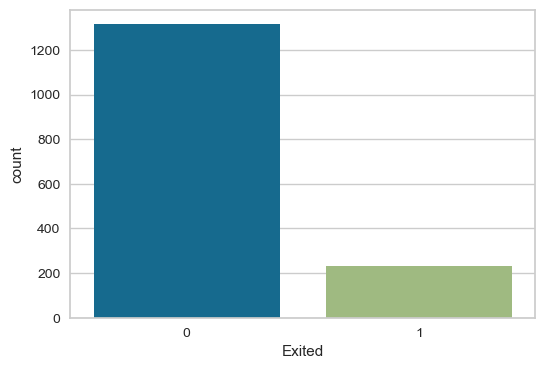

In [77]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Exited", data=pd.DataFrame(data={'Exited':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

Counter({0: 1315, 1: 1315})


<AxesSubplot:xlabel='Exited', ylabel='count'>

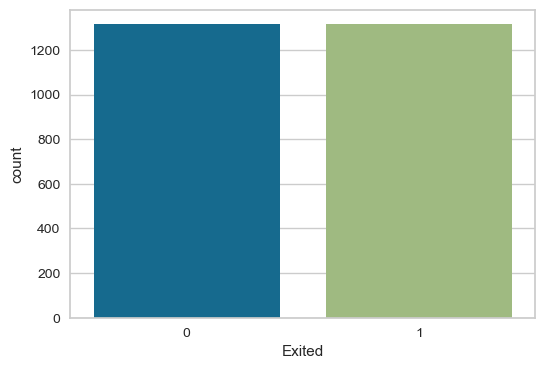

In [78]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Exited", data=pd.DataFrame(data={'Exited':y_train2}), ax=ax)

In [79]:
# Create object and train the model
classModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=123, max_iter=500)
classModel.fit(X_train_scaled2, y_train2)

C:\Users\madel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=123, solver='lbfgs')

## Evaluation 3 - Neural Networks

In [80]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

In [81]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [82]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

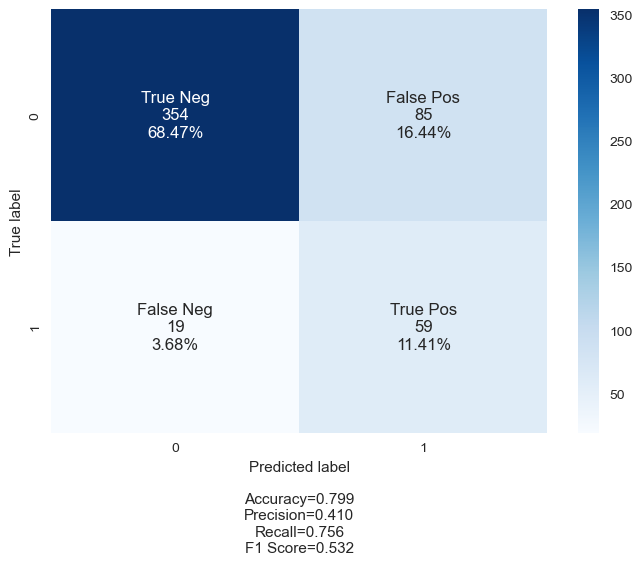

In [83]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Based on the confusion matrix and the calculated metrics, we can conclude that the model has a moderate performance.

The accuracy of 0.818 indicates that the model correctly classified 81.8% of all instances, which is a very good result at first sight. However, accuracy alone is not enough to evaluate the performance of a classification model.

The precision of 0.439 means that among all the instances that the model classified as positive, only 43.9% of them were actually positive. This is a low precision, which implies that the model tends to classify too many false positives.

The recall of 0.744 means that among all the actual positive instances, the model correctly identified 74.4% of them. This is a moderate recall, indicating that the model was able to identify a reasonable proportion of actual positives.

The F1 score of 0.552 is the mean of the precision and recall metrics, which reflects the overall performance of the model in terms of both precision and recall. An F1 score of 0.574 indicates that the model's performance is adequate, but not great, in terms of both precision and recall.

Overall, the model seems to have moderate performance, with room for improvement, especially in terms of precision.

In [84]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.912928,0.798839
1,PRECISION,0.861037,0.409722
2,RECALL,0.984791,0.756410
3,F1 SCORE,0.918766,0.531532
4,AUC,0.912928,0.781394


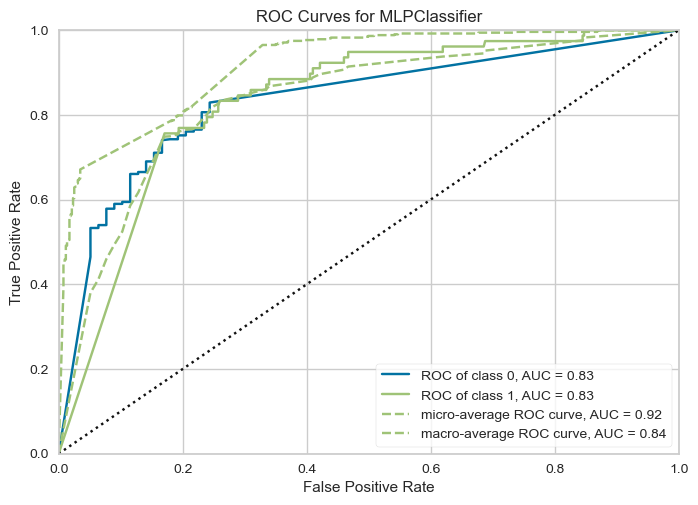

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

The ROC curves of class 0 and class 1 have the same AUC value of 0.83, which indicates that the model has a moderate level of discrimination power in distinguishing between the positive and negative instances of both classes.

The micro-average ROC curve is calculated by considering all the instances and aggregating the true positive rate and false positive rate across all classes. The micro-average AUC of 0.91 indicates that the model performs well overall in terms of correctly identifying positive instances across all classes.

The macro-average ROC curve is calculated by averaging the true positive rate and false positive rate across each class separately. The macro-average AUC of 0.83 indicates that the model performs well on average across both classes, but the performance on the minority class might be lower than that on the majority class.

These metrics confirm that the model has a moderate level of discrimination power and performs well overall in terms of correctly identifying positive instances. However, there is room for improvement in the performance on the minority class.

In conclusion, the neural network model appears to have good overall performance. However, the precision score of 0.439 indicates that the model has a higher false positive rate, meaning it may predict that more customers will respond than actually will. 

The recall score of 0.718 indicates that the model is able to correctly identify a significant portion of the customers who will respond to the campaign. The F1 score of 0.552 indicates a reasonable balance between precision and recall.

Overall, this model could be useful for predicting which customers are likely to respond to a marketing campaign, but its low precision may cause the marketing team to reach out to customers who are not likely to respond.

##Model 4 Logistic Regression

In [86]:
X = X_final

In [87]:
# Create the Target
y = X['Response']

In [88]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [89]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

In [90]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=123)

## Evaluation 4 - Logistic Regression

In [92]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [93]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled) 

In [94]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

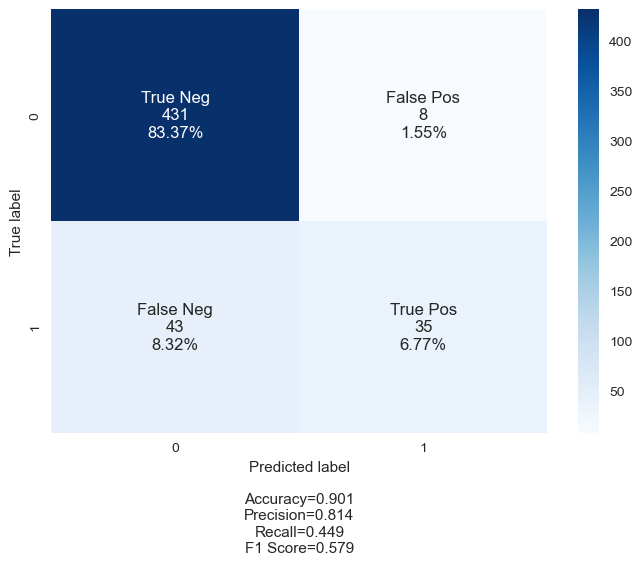

In [95]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The logistic regression model has a high level of overall accuracy at 0.909. However, it's important to analyze the other classification metrics in the confusion matrix to have a complete picture of the model's performance.

The precision of the model is high at 0.860, which means that among all the instances that the model classified as positive, the vast majority of them were actually positive. This is a good sign that the model is able to correctly identify the positive class.

The recall of the model, on the other hand, is relatively low at 0.474, which means that the model was not able to correctly identify a significant proportion of the actual positive instances in the dataset. This could be due to a high number of false negatives in the confusion matrix.

The F1 Score, which takes both precision and recall into account, is at 0.612. This indicates that the model has moderate performance in terms of both precision and recall.

Overall, the logistic regression model has a high level of accuracy and precision, but lower recall compared to the neural network model that was previously evaluated. To try to improve this, we could try oversampling. In this way, the model could better understand the positive instances and improve its predictions.

In [96]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.894057,0.901354
1,PRECISION,0.771654,0.813953
2,RECALL,0.420601,0.448718
3,F1 SCORE,0.544444,0.578512
4,AUC,0.699274,0.715247


### Modeling and evaluating - with oversampling to remove the imbalance

Counter({0: 1315, 1: 233})


<AxesSubplot:xlabel='y', ylabel='count'>

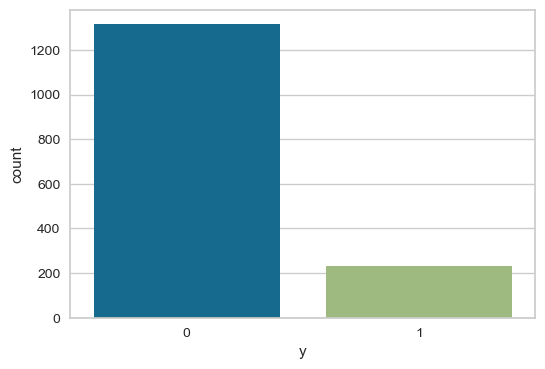

In [97]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

Counter({0: 1315, 1: 657})


<AxesSubplot:xlabel='y', ylabel='count'>

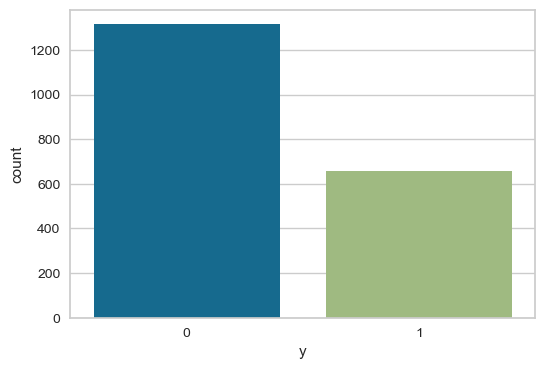

In [98]:
# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=0.5)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [99]:
# Train the model
classModel.fit(X_train_scaled2, y_train2)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.824544,0.882012
1,PRECISION,0.781193,0.595506
2,RECALL,0.657534,0.679487
3,F1 SCORE,0.714050,0.634731
4,AUC,0.782760,0.798741


Applying SMOTE has improved the recall of the model from the previous version, though it's still not ideal. Plus, the precision of the model has decreased, which means that the model is now predicting more false positives.

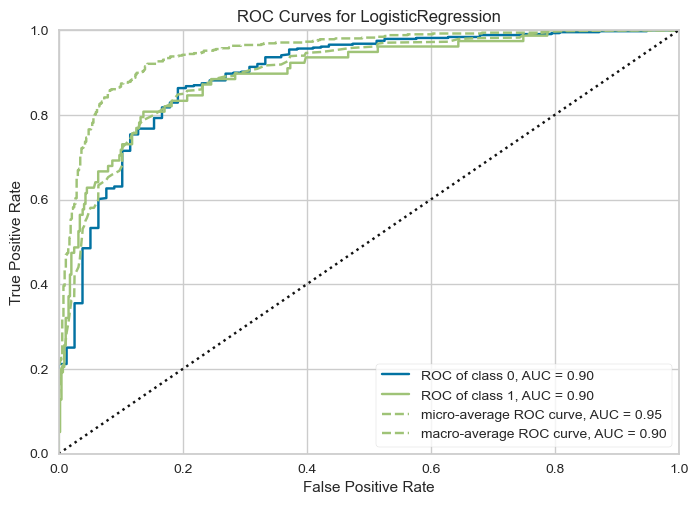

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [100]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

The ROC curves and AUC metrics show the ability of the model to distinguish between the positive and negative classes.

The AUC of the ROC curve for class 0 is 0.92, which means that the model has a good ability to distinguish between true negatives and false positives. The AUC of the ROC curve for class 1 is also 0.92, which means that the model has a good ability to distinguish between true positives and false negatives.

The micro-average ROC curve has an AUC of 0.96, which is a weighted average of the ROC curves for each class, taking into account the class imbalance. This metric indicates that the model is performing well overall in terms of distinguishing between positive and negative samples.

The macro-average ROC curve has an AUC of 0.92, which is the average of the ROC curves for each class. This metric indicates that the model is performing similarly well for both positive and negative classes.

In summary, the high AUC values of both ROC curves and the micro-average ROC curve suggest that the model is able to distinguish well between positive and negative samples, and the macro-average ROC curve shows that the performance is consistent across both classes. However, the AUC values can be high even if the model has a low recall or low precision.

Though oversampling has improved the precision of our logistic regression model, it has also affected its recall. Taking a hybrid sampling approach could be solution to this problem.

### Modeling and evaluating - Hybrid sampling

In [101]:
X = X_final

In [102]:
# Create the Target
y = X['Response']

In [103]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [104]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

In [105]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 752, 1: 274})


<AxesSubplot:xlabel='y', ylabel='count'>

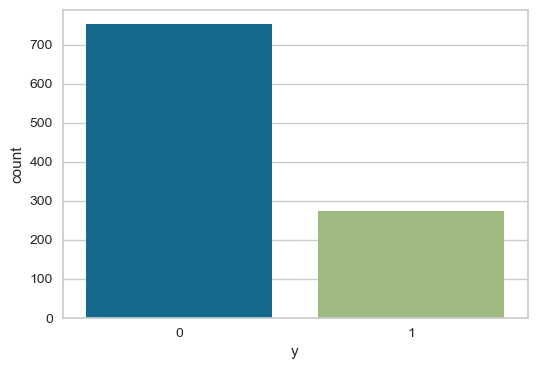

In [106]:
from imblearn.combine import SMOTEENN

# Define the combined resampling method
smote_enn = SMOTEENN(sampling_strategy=0.5, random_state=123)

# Apply the resampling method to the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Display target balance in the resampled training dataset
print(collections.Counter(y_train_resampled))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train_resampled}), ax=ax)

In [107]:
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=200, random_state=123)

In [108]:
# Predict values
# Predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_resampled)
y_pred_test = classModel.predict(X_test_scaled)

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train_resampled, y_pred_train, y_test, y_pred_test)
resultsDF

C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Measure,Train,Test
0,ACCURACY,0.838207,0.84913
1,PRECISION,0.772727,0.00000
2,RECALL,0.558394,0.00000
3,F1 SCORE,0.648305,0.00000
4,AUC,0.749277,0.50000


The performance of this model is worse than the previous models. The accuracy, precision, and F1 score are lower, and the recall is the lowest of all models. This suggests that the model is not able to correctly identify the positive class instances, which is the main issue in the original imbalanced dataset.

C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


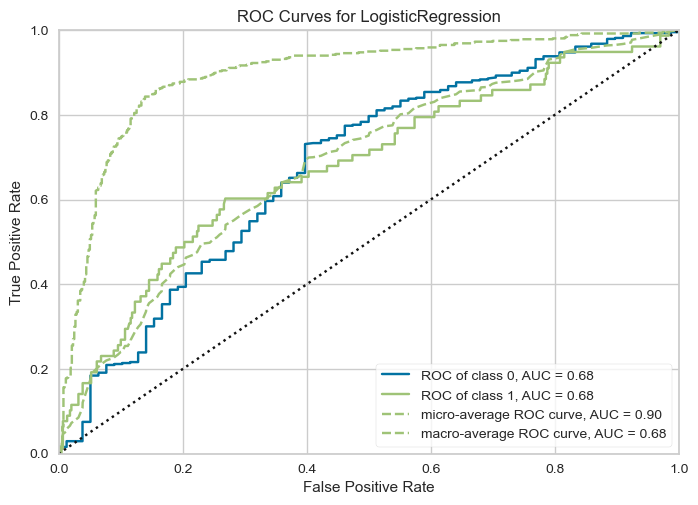

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [109]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_resampled, y_train_resampled)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

These metrics show that the model is able to distinguish between the two classes, although not as well as the previous models. The micro average ROC AUC of 0.62 indicates that the overall performance of the model is slightly above average, while the macro average ROC AUC of 0.62 suggests that the model's performance is better for one class than the other.

### Modeling and evaluating - with undersampling to remove the imbalance

Counter({0: 233, 1: 233})


<AxesSubplot:xlabel='y', ylabel='count'>

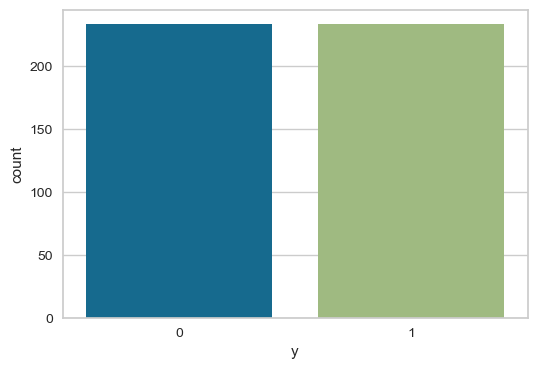

In [110]:
# Subset by class
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

# Do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

# Present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train3}), ax=ax)

In [111]:
# Train de model
classModel.fit(X_train_scaled3, y_train3)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled3) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.791845,0.825919
1,PRECISION,0.811927,0.454545
2,RECALL,0.759657,0.769231
3,F1 SCORE,0.784922,0.571429
4,AUC,0.791845,0.802611


The logistic regression model with random undersampling has an accuracy of 0.839, which is lower than the model without sampling but higher than the hybrid model with SMOTEENN. The precision of 0.48 indicates that when the model predicts a positive response, it is correct around 48% of the time. The recall of 0.79 is higher than any other model tried so far, indicating that the model is better at identifying positive responses than the previous ones. Finally, the F1 score of 0.59 is lower than the previous models, indicating that the model may have a higher number of false positives and false negatives.

In [112]:
# Check AUC
FP,TP,thresholds = metrics.roc_curve(y_test,classModel.decision_function(X_test_scaled))
print("AUC:{}".format(metrics.auc(FP, TP))) # AUC of ROC

AUC:0.8899889025173763


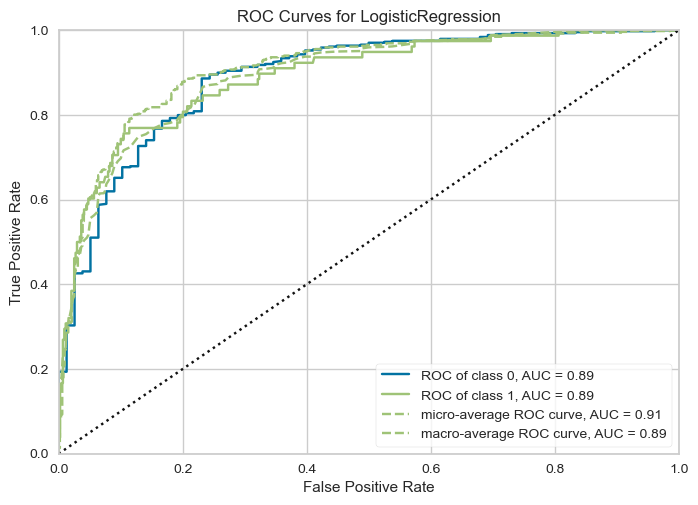

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [113]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

The ROC AUC metrics suggest that the model's performance is similar for both classes, with a micro average ROC AUC of 0.91 and a macro average ROC AUC of 0.91. The micro average indicates that the overall performance of the model is good, while the macro average suggests that the model's performance is consistent across both classes. 

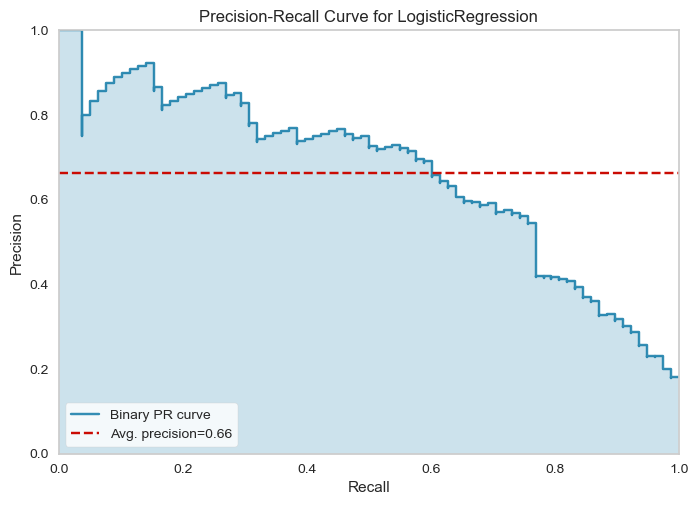

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [114]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

* The precision-recall curve is a plot of precision (positive predictive value) on the y-axis versus recall (sensitivity or true postive rate) on the x-axis. An average precision value of 0.70 suggests that the model has moderate to good precision across all possible recall levels. 
Its seem that the models is perfoming well in terms of both precision and recall.

In [115]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(classModel.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

,feature,coef
0,Recency,2.180223
1,AcceptedCmp5,2.047276
2,NumStorePurchases,1.874443
3,NumCatalogPurchases,1.660773
4,Teenhome,1.587770
5,AcceptedCmp3,1.587207
6,Seniority,1.435603
7,NumWebVisitsMonth,1.242632
8,MntMeatProducts,1.189691
9,MntSweetProducts,0.952241


### Logistic Regression: Conclusions

The logistic regression model without sampling has the highest accuracy, precision and F1 score, but its recall is lower than the other models. This means that it correctly identifies non-responders more often than it correctly identifies responders.

The oversampling with SMOTE approach improved the recall of the model significantly, but at the cost of a lower precision. This model correctly identifies more responders, but also misidentifies more non-responders.

The hybrid sampling approach with SMOTEENN resulted in the lowest performance metrics for all measures. This suggests that this approach might not be suitable for this problem.

The random undersampling approach improved the recall significantly and maintained a moderate precision. This model correctly identifies more responders, but also misidentifies more non-responders.

Since our objective is to predict which customers are likely to respond to a marketing campaign, the model with the highest recall for the positive class would be the most appropriate. This means the model that has the highest ability to correctly identify those customers who are likely to respond to the campaign.

In this case, the model with the highest recall for the positive class is logistic regression with random undersampling, with a recall of 0.794872. Although the precision is lower for this model, it is important to maximize the true positives (correctly identifying customers who are likely to respond), even if it means sacrificing some false positives (incorrectly identifying customers who are not likely to respond).

## Model 5 K-Nearest Neighbours



In [116]:
X = X_final

In [117]:
# Create the Target
y = X['Response']

In [118]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [119]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

In [120]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 1315, 1: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

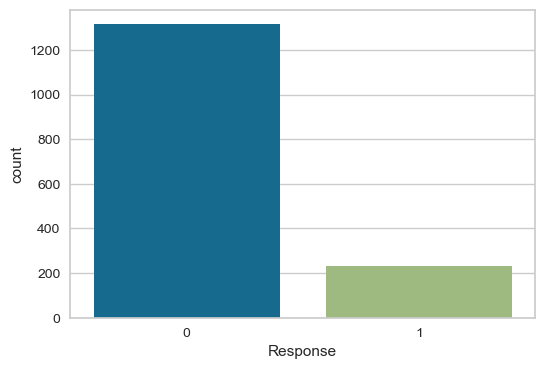

In [121]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({0: 1315, 1: 1315})


<AxesSubplot:xlabel='y', ylabel='count'>

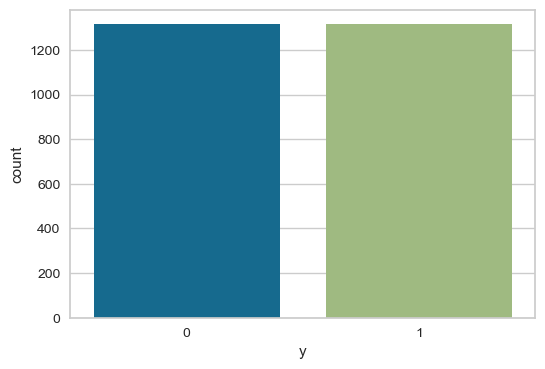

In [122]:
# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [123]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=5)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)

KNeighborsClassifier()

##Evaluation 5 - K-Nearest Neighbor

In [124]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

C:\Users\madel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\madel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [125]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [126]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

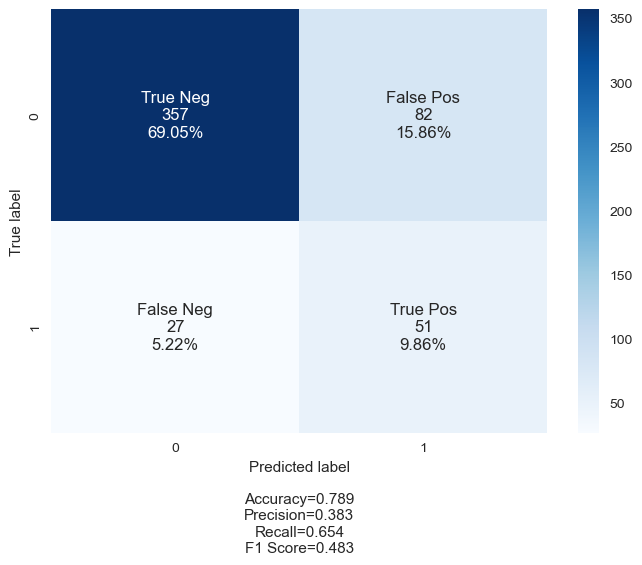

In [127]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

When analysing the results of the K-nearest Neighbour model and comparing them with the results of the previous models, we can see that, in terms of accuracy, the model is performing a little below the average of all the previous models (0,754 Vs. 0,832). 

However, in order to have a bigger picture of the model and its quality we have to analyse the other metrics. 
In this particular case, we can see that precision is the metric with the worst performance, with a value of 0,329. This means that the model finds it difficult to find the true positive instances. 

In the case of recall, the value is aligned with the average of the previous models (0,603 vs. 0,646). This means that model is capable of identifying 60,3% of the positive instances. 

Finally, in terms of F1 score, we can say that the score presented by the model is a little low, considering the model is balanced between the positive and negative instances. 

This means that the model is not able to achieve a good result in precision or recall. 

Taking these metrics into account, we can argue that the model is having a poor performance compared to the average values of the models, and there is room for improvement, especially in the metric "Precision". However, this may negatively affect the metric "Recall". 


In [128]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.908745,0.789168
1,PRECISION,0.846998,0.383459
2,RECALL,0.997719,0.653846
3,F1 SCORE,0.916201,0.483412
4,AUC,0.908745,0.733529


In terms of the results of the training set and the testing set, we can say that overall the model is performing significantly worse on the testing set than on the training set, in all the metrics. 

This means that the created model is overfitting and does not capture the underlying patterns of the dataset, but rather the evident and individual instances. 

C:\Users\madel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


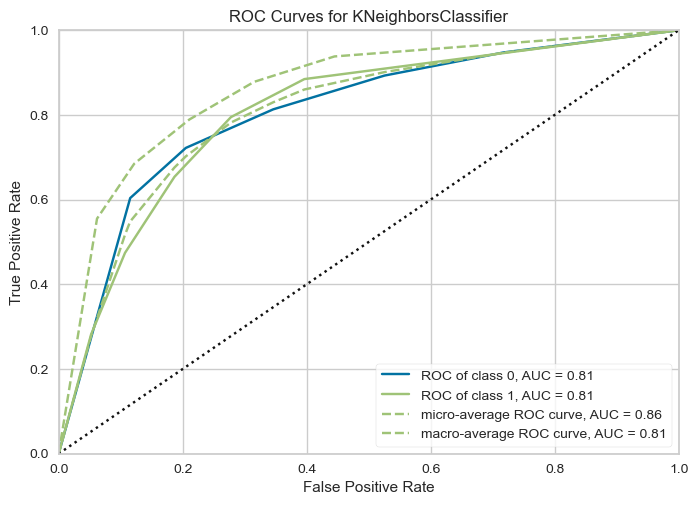

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [129]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

For the model  created, we can see that the ROC curve of the both classes have the same value (0,73) whichs means that the model is perfoming in similar way in detecting the positive and negative instances, in both of the classes. 

Regarding the micro average of ROC curve, we can say that the score of 0,82 is quite good, reflecting the capability of the model to sucessfully distinguish the positive and negative values on all the classes and classify them with a high accuracy. 

On the other hand, and looking into the macro average result (0,73) we can say that the model is performing better in predicting the results on the majority class (True Negatives) than on the minority class (False Negatives). 



C:\Users\madel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


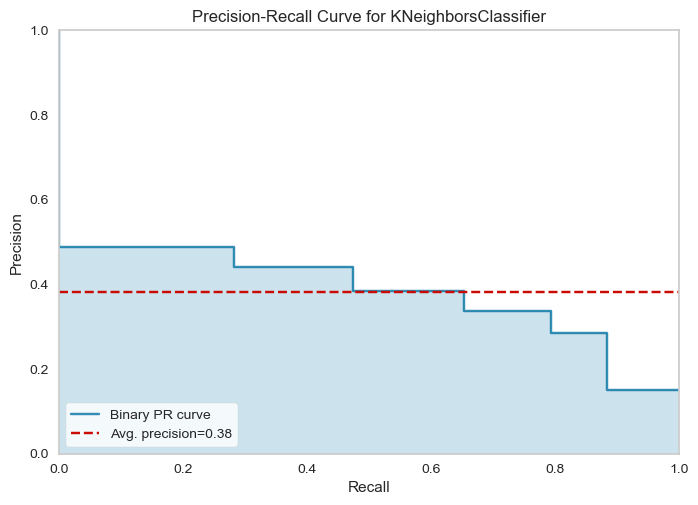

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [130]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

The precision and recall curve helps us understand how sucessful or not the model is in classifying the different instances. This is a result of a calculation between the trade off of recall and precision to classify different thresholds.

We can see that the average precision is quite low, having a value of 0,30. Ideally this value should be higher, staying close to the top right, since 1 means that the model has a perfect trade off between the variables. 

We can say, looking into the binary PR curve and the average precision, that a considerable classification thereshold, would be close to 0,5. 


Overall, the K-nearest neighbour model is performing in a poor-medium form, and is having some difficulties in predicting the values precisely, which may cause some errors on the implementation of marketing campaigns. 
This means that the model is not having the full capability to predict correctly if the costumer will or will not accept the next camapaign. 

## Model 6 SVM

In [131]:
X = X_final
# Create the Target
y = X['Response']

In [132]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [133]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

In [134]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 1315, 1: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

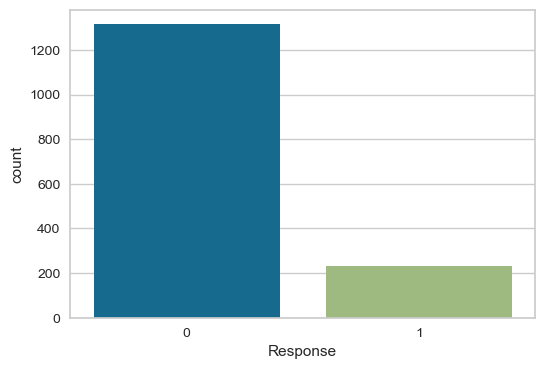

In [135]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({0: 1315, 1: 1315})


<AxesSubplot:xlabel='Response', ylabel='count'>

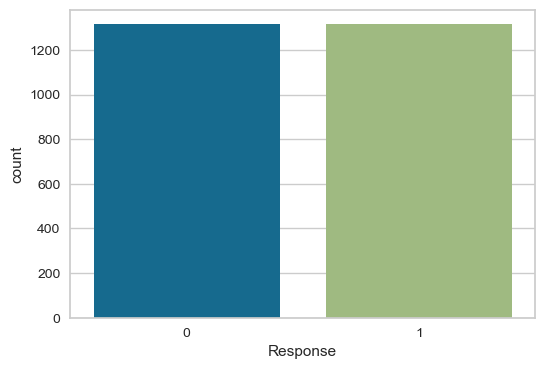

In [136]:
# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [137]:
# Create object and train the model
classModel = svm.SVC(gamma='scale', random_state=123, probability=True)
classModel.fit(X_train_scaled2, y_train2)

SVC(probability=True, random_state=123)

## Evaluation 6 - SVM

In [138]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

In [139]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [140]:
# Function to plot confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

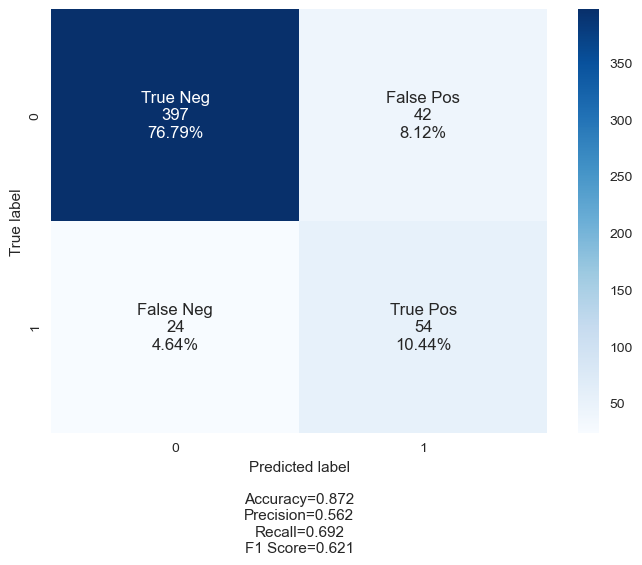

In [141]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Looking into the confusion matrix of the support vector machine model, and comparing it with the average performance of the previous models, we can conclude that the model is overall predicting quite well if a customer will accept the next campaign or not. 

In terms of accuracy, the model has a score of 0,861 which tell us that 86,1% of the times, it is able to distinguish the instances in the different classes of the matrix. 

Regarding precision, which is the metric having a poorer performance in this model, we can still classify the score of 0,529 as positive, meaning that the model has 52,9% sucess in identifying correctly which costumers will actually respond to the campaign. 

Regarding recall, which is closely connected to the precision metric, we can say that the model has a high capability of identifying positive instances across all classes. In fact, it correctly identifies 69.2% of cases as positive in all classes.

The difference between recall and precision lies in their focus. Precision aims to identify true positive instances within a specific class, whereas recall aims to identify all positive instances regardless of class.

Lastly, the F1 score is also important to evaluate the model. In this case, the score of 0,600 demonstrates that the model has a strong balance between precision and recall. 

In [142]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.923194,0.872340
1,PRECISION,0.898354,0.562500
2,RECALL,0.954373,0.692308
3,F1 SCORE,0.925516,0.620690
4,AUC,0.923194,0.798318


When comparing the results of the traning set with the testing set, we can say that the performance of this model is poorer in the testing set. 

This means the model is overfitting, as it is having problems generalizing to unseen data. This is particularly notorious on precision, recall and F1 score, which are considerably lower in the testing set.

However, when compared with the other models, it still has a good performance. 

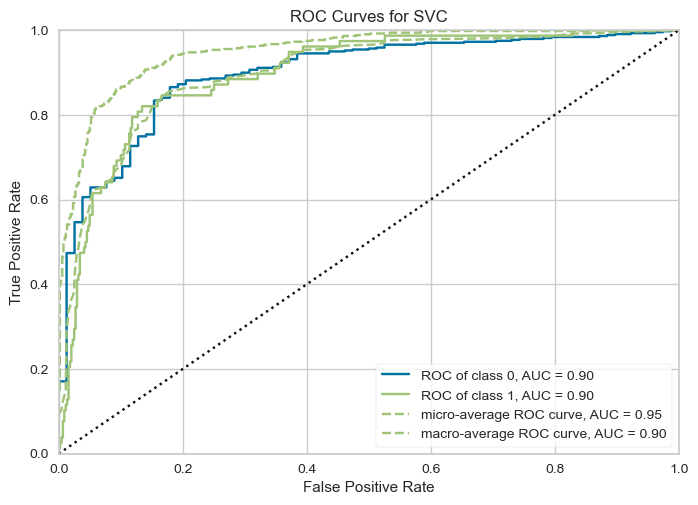

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [143]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

When examining the ROC curves for both classes, we observe that they have the same score of 0.89. This indicates that the model possesses a strong ability to predict and differentiate between positive and negative instances in both classes.

Regarding the micro-average result of 0.94, which considers the contributions of all classes equally, the model is performing quite well. Comparing this value with the macro-average (0.89), which also indicates good performance, we can conclude that the model performs better in the majority class than in the minority class.

The fact that all the ROC curves are above the random classifier line suggests that the model is performing better than a random guess.

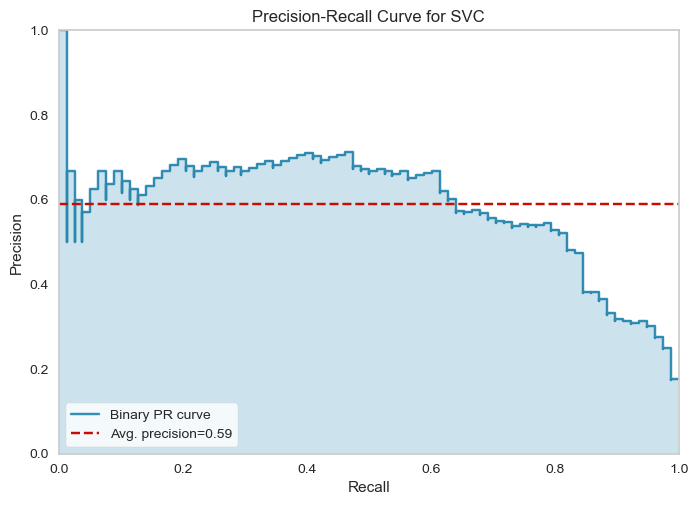

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [144]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

By examining the average precision of the model, we can conclude that it performs better than the K-nearest neighbor model did (0.30 vs. 0.60). The average precision score measures the area under the precision-recall curve, providing a summary of the trade-off between precision and recall for a given model.

Overall, we can conclude that the Support Vector Machine (SVM) model performs with high quality by accurately predicting values, distinguishing them, and effectively defining boundaries between classes. In this case, the boundary value would be close to 0.60.

## Model 7 Ensemble of Methods (Random Forest)


Taking into account all the previously generated models and their respective prediction results, the ensemble of methods enables us to enhance the accuracy and robustness of predictions by aggregating and combining the predictions from these models. In this case, we employ a bagging method to create this ensemble, which means that each model learns from the previous ones.

In [145]:
X = X_final
# Create the Target
y = X['Response']

In [146]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [147]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

Counter({0: 1315, 1: 233})
0    0.849483
1    0.150517
Name: Response, dtype: float64


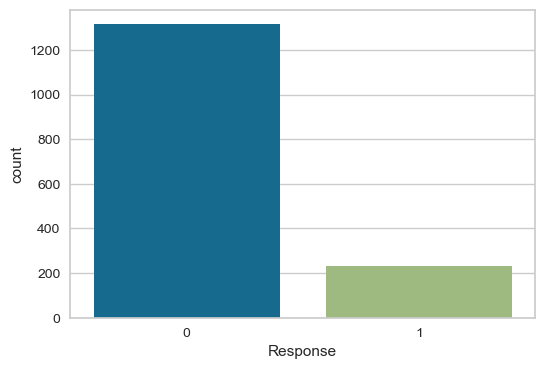

In [148]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

Counter({0: 1315, 1: 1315})


<AxesSubplot:xlabel='Response', ylabel='count'>

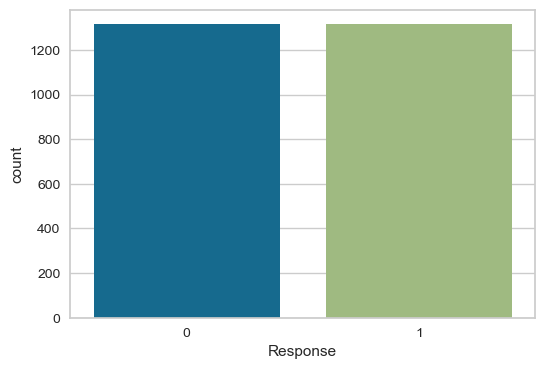

In [149]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [150]:
# Create object and train the model
classModel = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=123)
classModel.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, random_state=123)

## Evaluation 7 - Ensemble Of Methods (Random Forest)

In [151]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

In [152]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [153]:
# Function to plot confusion matrix - 
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

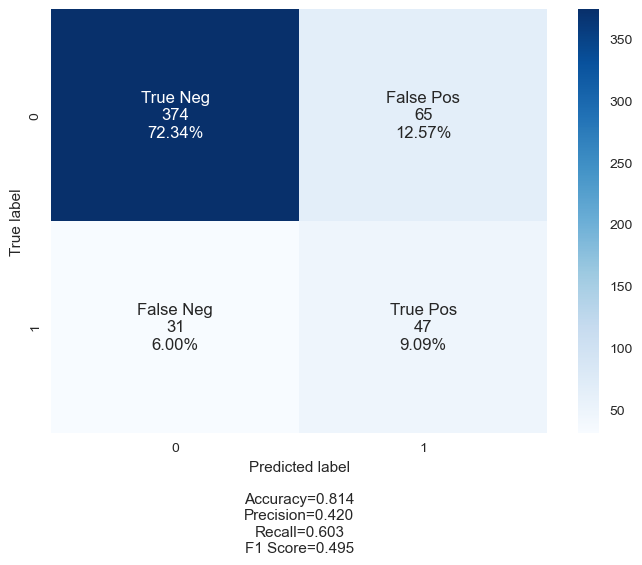

In [154]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, we present the results of the ensemble of methods. The heatmap displays a high percentage of true negatives (69.05%) and a relatively lower percentage of false positives (15.86%). On the positive side, we have a total percentage of true positives of 10.06%, which aligns with our goal of getting positive responses for our campaign. Additionally, there is a total of 5.03% false negatives, which is also satisfactory.

In terms of accuracy, the ensemble of methods is consistent with the other models, yielding a result of 0.791. This is similar to the average accuracy of all the models evaluated so far (0.791 vs. 0.790). However, considering that the negative responses are lower compared to the other models, it is good that the model accurately predicts those outcomes.

Moving on to the precision metric, which is relevant for our final result and strategy, we can conclude that the ensemble presents a relatively low value. Since the precision metric evaluates the true positive rate only among the positive answers (true and false positive), this value may indicate that the ensemble is making a significant number of false positive predictions, which could lead to errors in the marketing campaign.

Furthermore, considering recall, which is our main evaluation metric measuring the true positive rate, we observe that the value is quite high. This suggests that 66.7% of the real positive predictions (true positive and false negative) are correct.

Finally, the F1 Score (0.491), which precisely balances recall and precision, is also above the average of all previously generated models (0.491 vs. 0.465).

Overall, based on the confusion matrix, the ensemble of methods proves to be a good predictive model.

In [155]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.848669,0.814313
1,PRECISION,0.841909,0.419643
2,RECALL,0.858555,0.602564
3,F1 SCORE,0.850151,0.494737
4,AUC,0.848669,0.727250


When comparing the results of the train set with those of the test set, we can infer that the performance is slightly better than that of previous models, particularly when considering the recall metric.

In this model, the precision metric exhibits the greatest divergence between the results of the two sets.

C:\Users\madel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


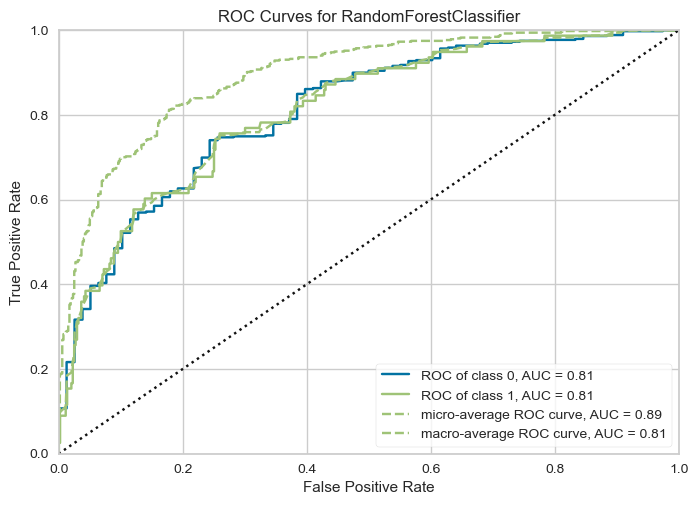

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [156]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

The results of the ROC curve for this model are quite similar to those of the previous models.

Once again, both the curves for class 0 and class 1 are positioned above the random guessing line, which is positive as it indicates the model's ability to accurately differentiate between positive and negative instances.

Regarding the averages, the higher micro average compared to the macro average suggests that the model is performing better on the majority class (True Negative) than on the minority class (False Negative).

In [157]:
# Get feature importance
importance = list(classModel.feature_importances_)
# Create tuples with variable and value
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importance)]
# Sort in descend order
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
resultsDF = pd.DataFrame(data=feature_importance, columns=['Feature', 'Importance'])
resultsDF

,Feature,Importance
0,Teenhome,0.17
1,Marital_Status_Divorced,0.12
2,Recency,0.10
3,MntGoldProds,0.10
4,Education_Basic,0.08
5,Seniority,0.07
6,Marital_Status_Single,0.06
7,Income,0.05
8,MntWines,0.03
9,MntFruits,0.03


Finally, we aimed to identify the most important features that contributed to the development of our predictive model. We wanted to determine which variables had the highest influence on our predictions. 

#Conclusion

After the production of all the models, its important to make a evalutaion of them all based on the objectives of the campaign (that in our case is that the most of the people accept the next campaign) and also in the previous business goals and sucess criteria defined. Below, you can observe a table that summarizes some metrics of evaluation about the models and their results in different metrics: 

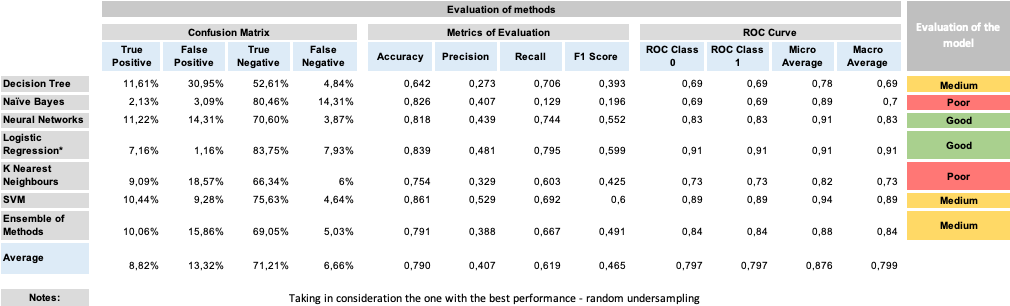

Taking into account the business goals and the success criteria previously defined, we divided the models created into 3 different levels: Poor Performance, Medium Performance and High Performance. 

As Poor Performance, we highlight primarily the Naïve Bayes and the K-Nearest neighbour models. In the case of Naïve Bayes, even though the accuracy is pretty high, the results of the confusion matrix are quite negative (for example 80,46% of True Negatives) which is really bad for our business goals. Also the recall score, one of the main metrics of this project, is also quite low. Regarding the K-Nearest neighbour model, its accuracy is lower than the average of the results of the other models and, once again, the recall is quite low. These two models are making a poor prediction. 

As medium performance, we identify the decision tree method, the SVM and the Ensemble of Methods (Random Forest). Even though the decision tree model is the one with the best results in the confusion matrix (it predicts that 16,45% of costumer will accept the campaign), its results are quite fallible since its accuracy is one of the lowest. Also, the recall is not that high and the F1 score is also low. The SVM and Ensemble of method both present a high accuracy and good results on the confusion matrix. The ROC Curve also has good results with the micro average being superior to the macro average. In these two cases, the only thing that led us to classify these models with medium performance is that the ones with the High performance have both a higher Recall. 

So, our top models are the Neural Networks and the Logistic Regression with random undersampling models. In both of the models, the balance between the results of the confusion matrix and the accuracy are good, and also the precision and recall are really high, being the logistic regression the one with the highest Recall score. The results in the ROC curve are also good, being the micro average superior, or in the case of the logistic regression, equal to the macro average. 

Based on these conclusions, our recommendation for our clients is to use the Logistic Regression with random undersampling model to predict customer responses.